# Business Problem Understanding

## Problem Statement

Faktor apa saja yang bisa mempengaruhi kepuasan pelanggan di industri penerbangan?
<br><br>
Sebagian besar perusahaan menyadari bahwa menyediakan pelanggan mereka dengan pengalaman yang terbaik adalah kebutuhan strategis, tetapi kebanyakan menyatakan bahwa mereka tidak dapat mengelolanya secara efektif. Masalah ini diperparah karena banyaknya poin interaksi dengan pelanggan didalam industri penerbangan.
<br><br>
Persepsi pelanggan terhadap pelayanan perusahaan dapat mempengaruhi perusahaan terutama pada 4 (empat) poin dibawah:

![](https://www.mycustomer.com/sites/default/files/styles/content_full_width/public/green1.png?itok=xoMY3clD)

Oleh karena itu, manajemen pengalaman pelanggan yang efektif harus dianggap sebagai keharusan bagi perusahaan.
<br><br>
Jika kita bisa memanfaatkan analisis data untuk mengantisipasi kepuasan pelanggan dan faktor-faktor apa saja yang bisa mempengaruhi kepuasan pelanggan, kita bisa melakukan penanggulangan sebelum adanya ketidakpuasan dari pelanggan.

![](https://www.mycustomer.com/sites/default/files/green3_1.jpg)

## Goals

Dalam projek kali ini kita membahas dalam sudut pandang maskapai penerbangan dan akan menjawab beberapa pertanyaan:
1. Apa saja insight yang dapat diambil dari data yang dimiliki?
2. Faktor apa saja yang mempengaruhi penilaian pelanggan secara signifikan?
3. Apakah ada pengembangan yang dapat dilakukan untuk meningkatkan tingkat kepuasan pelanggan?

## Analytic Approach

Untuk menjawab pertanyaan-pertanyaan di atas, maka kita akan menganalisis data untuk menemukan hal-hal apa saja yang berpengaruh dalam penilaian kepuasan pelanggan, dimana kemudian kita akan membangun model **klasifikasi** yang akan membantu perusahaan untuk melihat perbandingan pelanggan yang puas dan tidak serta langkah apa saja yang perlu diambil untuk memperbaikinya.

## Metric Evaluation

![Confusion Matrix](https://raw.githubusercontent.com/PurwadhikaDev/ZetaSquad_JC_DS_LS_01_FinalProject/main/Images/Matrix.png)

*Type 1 error : False Positive*
<br>Konsekuensi: Kehilangan pelanggan yang dianggap puas 

*Type 2 error : False Negative*
<br>Konsekuensi:  Extra cost untuk insentif yang diberikan kepada pelanggan yang dianggap tidak puas

Berdasarkan konsekuensinya, maka kita akan membuat model yang dapat meminimalisir 2 hal:
1. Jumlah pelanggan yang dianggap puas tetapi justru tidak *(False Positive)*, karena dapat merugikan perusahaan (pelanggan tidak kembali) dan juga dapat menyebabkan kehilangan pelanggan baru (word of mouth).
2. Jumlah insentif yang diberikan kepada pelanggan *(False Negative)* sehingga cost yang keluar lebih efisien.

Meskipun terlihat bahwa konsekuensi dari False Positive lebih besar, kita juga tetap harus memperhatikan konsekuensi yang didapat dari False Negative. Oleh karena itu, kita akan menggunakan **f1-score** sebagai 
measurement.

<br>**References :**
- https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2
- https://www.statology.org/f1-score-vs-accuracy/

# Data Understanding

Dataset source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
<br><br>

Dataset ini merupakan survei kepuasan pelanggan sebuah airline yang disusun oleh **John D pada tahun 2018** (https://www.kaggle.com/datasets/johndddddd/customer-satisfaction), yang kemudian dimodifikasi oleh **TJ Klien pada tahun 2020** untuk tujuan klasifikasi. Berdasarkan **jangka waktu tersebut**, maka data ini valid untuk digunakan dalam membantu memecahkan masalah yang ada.
<br><br>

Setiap baris dari dataset mewakili data penerbangan seorang pelanggan serta kepuasan yang mereka rasakan dari servis yang tersedia. (untuk detil bisa dilihat di section selanjutnya)
<br><br>

Target Klasifikasi `[satisfaction]`:
- 0 : Pelanggan netral atau tidak puas
- 1 : Pelanggan puas

## Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Gender | Text | Gender of the passengers (Female, Male) |
| Customer Type | Text | The customer type (Loyal customer, disloyal customer) |
| Age | Int | The actual age of the passengers |
| Type of Travel | Text | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| Class | Text | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| Flight distance | Int |The flight distance of this journey |
| Inflight wifi service | Int | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| Departure/Arrival time convenient | Int | Satisfaction level of Departure/Arrival time convenient |
| Ease of Online booking | Int | Satisfaction level of online booking |
| Gate location | Int | Satisfaction level of Gate location |
| Food and drink | Int | Satisfaction level of Food and drink |
| Online boarding | Int | Satisfaction level of online boarding |
| Seat comfort | Int | Satisfaction level of Seat comfort |
| Inflight entertainment | Int | Satisfaction level of inflight entertainment |
| On-board service | Int | Satisfaction level of On-board service |
| Leg room service | Int | Satisfaction level of Leg room service |
| Baggage handling | Int | Satisfaction level of baggage handling |
| Check-in service | Int | Satisfaction level of Check-in service |
| Inflight service | Int | Satisfaction level of inflight service |
| Cleanliness | Int | Satisfaction level of Cleanliness |
| Departure Delay in Minutes | Int | Minutes delayed when departure |
| Arrival Delay in Minutes | Float | Minutes delayed when Arrival |
| satisfaction | Int | Airline satisfaction level(Satisfied, neutral or dissatisfied) |

## Import Libraries & Dataset

In [ ]:
!pip install category_encoders

In [ ]:
!pip install catboost

In [ ]:
!pip install shap

In [6]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('seaborn')

from IPython.display import Image, display
from IPython.core.display import HTML 

# Feature Engineering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
import shap

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [7]:
# Load Dataset from GitHub
url = 'https://raw.githubusercontent.com/PurwadhikaDev/ZetaSquad_JC_DS_LS_01_FinalProject/main/Dataset/train.csv'
df = pd.read_csv(url)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Numerical Features

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## Categorical Features

In [9]:
df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


# Data Cleaning

## General

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0,0.0,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
2,Gender,object,0,0.0,2,"[Male, Female]"
3,Customer Type,object,0,0.0,2,"[Loyal Customer, disloyal Customer]"
4,Age,int64,0,0.0,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
5,Type of Travel,object,0,0.0,2,"[Personal Travel, Business travel]"
6,Class,object,0,0.0,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,int64,0,0.0,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
8,Inflight wifi service,int64,0,0.0,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,int64,0,0.0,6,"[4, 2, 5, 3, 1, 0]"


Kita dapat memperhatikan beberapa hal pada tabel.
<br><br>

Pertama, kita melihat bahwa kolom target `satisfaction` masih berbentuk *string*, maka kita akan mengubahnya terlebih dahulu menjadi *int* (0 dan 1).

- 0 = Neutral or dissatisfied 
- 1 = Satisfied 

In [12]:
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)

In [13]:
df['satisfaction'].unique()

array([0, 1])

Feature berhasil diubah. Mari kita lanjut ke tahap selanjutnya.

## Drop Columns

Dari tabel di atas, terdapat feature `Unnamed: 0` dan `id` yang merupakan feature yang tidak berpengaruh kepada `satisfaction`, maka kita dapat menghapusnya.

In [14]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

In [15]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Feature berhasil di drop. Kemudian, kita akan mengecek kondisi missing value dari feature lainnya.

## Handling Missing Value

Berdasarkan tabel, terdapat **310 missing value** pada feature `Arrival Delay in Minutes`, atau sebesar **0.3%** dari keseluruhan data.

### Check Missing Pattern

Untuk memastikan metode yang paling baik untuk menghandle missing value yang ada, maka kita akan mengecek terlebih dahulu bagaimana **pola** dari missing value tersebut menggunakan library *missigno* (https://github.com/ResidentMario/missingno)

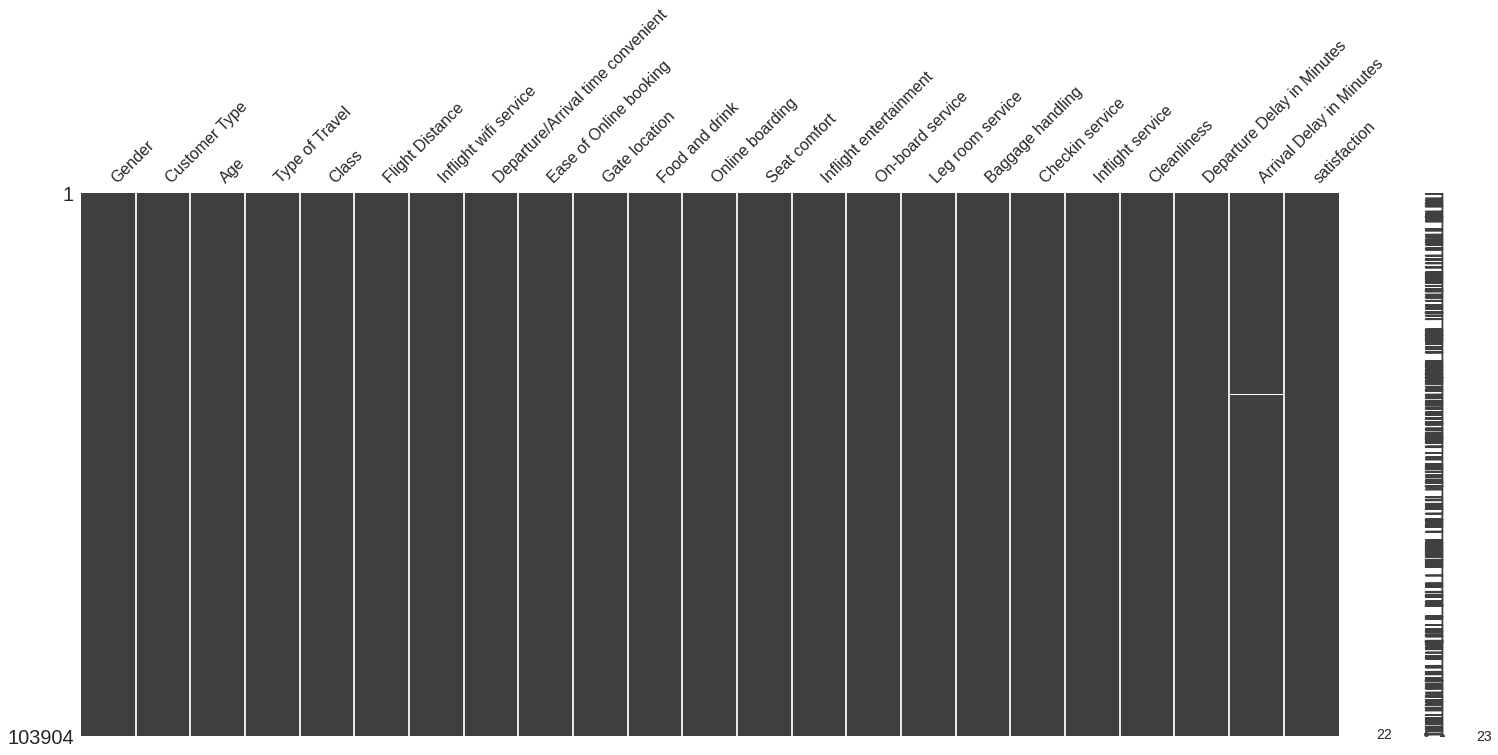

In [16]:
missingno.matrix(df)

In [17]:
listIndex = df[df['Arrival Delay in Minutes'].isnull()].index

ptr = 0
for x in range(len(listIndex)):
    print(listIndex[x], end=', ')

    ptr += 1
    if(ptr == 25):
      print('\n')
      ptr = 0

213, 1124, 1529, 2004, 2108, 2485, 2630, 3621, 4041, 4490, 4588, 4688, 4897, 5295, 5296, 5496, 6947, 7225, 8035, 8421, 8933, 9060, 9481, 9531, 9551, 

9940, 10634, 10880, 12036, 12689, 12808, 13501, 14185, 14301, 15223, 15371, 15683, 15860, 16132, 16329, 16503, 16881, 17234, 17808, 18429, 18620, 18724, 18796, 18871, 19498, 

19971, 20049, 20665, 21453, 21794, 22202, 22840, 22939, 22986, 23033, 23505, 24180, 26131, 26310, 26338, 26605, 26913, 27135, 27238, 27261, 27279, 27618, 27819, 27904, 27916, 

27992, 28352, 28494, 28959, 29486, 29918, 30504, 30529, 32197, 32558, 32864, 32916, 33056, 33059, 33271, 33470, 33870, 33937, 34140, 34464, 34677, 34727, 34837, 34841, 35248, 

35267, 35271, 35309, 35340, 35501, 35892, 35959, 36064, 36319, 36535, 37095, 37575, 37755, 37891, 38610, 38677, 39076, 39291, 39834, 40099, 40343, 40422, 40627, 41079, 41293, 

41980, 42300, 42438, 43051, 43246, 43815, 43829, 44057, 44094, 44230, 44326, 45064, 45081, 45245, 45307, 45870, 46087, 46295, 46563, 46758, 46

Sehubungan dengan **kecilnya missing value** pada feature, maka kita hanya dapat melihat 1 garis pada matrix missingno (kemungkinan lebih banyak missing value pada index tersebut). Setelah kita cek manual index dataset yang memiliki missing value, kita juga dapat melihat bahwa **tidak terdapat pola** pada feature tersebut.
<br><br>

Berdasarkan *domain knowledge*, kita dapat asumsikan bahwa terdapat hubungan erat antar feature `Arrival Delay` dengan `Departure Delay` (jika pesawat terlambat berangkat, maka ada kemungkinan pesawat terlambat sampai). Kita juga dapat buktikan menggunakan graph *line plot*.
<br><br>

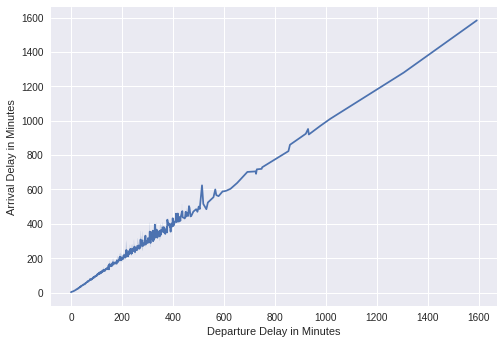

In [18]:
sns.lineplot(x=df['Departure Delay in Minutes'], y=df['Arrival Delay in Minutes'])

Mari kita asumsikan bahwa feature `Arrival` dikosongkan jika **tidak** terdapat delay pada feature `Departure`.

In [19]:
df[(df['Arrival Delay in Minutes'].isnull()) & (df['Departure Delay in Minutes'] == 0)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2630,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,3,5,4,5,5,5,5,5,5,5,0,NaN,1
4588,Male,Loyal Customer,33,Business travel,Business,2701,3,3,3,3,5,5,5,5,4,5,5,2,5,5,0,NaN,1
5296,Female,Loyal Customer,47,Personal Travel,Eco,834,1,1,1,3,2,2,3,3,3,1,2,4,3,2,0,NaN,0
7225,Male,Loyal Customer,48,Business travel,Business,391,1,1,1,1,4,5,4,5,5,5,5,4,5,5,0,NaN,1
8035,Female,Loyal Customer,40,Business travel,Business,2075,5,5,5,5,5,5,5,2,2,2,2,4,2,4,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98636,Male,Loyal Customer,54,Personal Travel,Eco,157,2,4,2,2,2,2,2,2,3,4,4,3,4,2,0,NaN,0
100962,Female,Loyal Customer,51,Business travel,Eco Plus,77,2,2,2,2,2,3,3,2,2,2,2,2,2,4,0,NaN,0
101532,Female,Loyal Customer,61,Personal Travel,Eco,1746,4,3,4,4,1,4,3,3,3,4,4,2,3,2,0,NaN,0
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,0


Ternyata hanya terdapat 116 baris dari 310 baris yang sesuai dengan asumsi, maka kita tidak dapat menyatakan tidak terdapat pola hubungan yang jelas.
<br><br>

Sekarang, dapat simpulkan bahwa missing value pada feature `Arrival Delay in Minutes` memiliki pola **Missing Completely at Random (MCAR)**. Salah satu metode yang dapat kita lakukan untuk menghandle missing value adalah dengan melakukan imputing.
<br><br>

**Reference :**
- https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac
- https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
- https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

### Impute with Multiple Imputation

Untuk menentukan metode terbaik, maka kita akan melakukan **cross validation**, hanya menggunakan data `Arrival Delay` dan `Departure Delay`, dan kemudian dapat kita lihat dari rata-rata f1-score tertinggi.
<br><br>

**Reference :**
- https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505
- https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

In [ ]:
# Feature/target arrays
X_full = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].copy()
y_full = df['satisfaction']

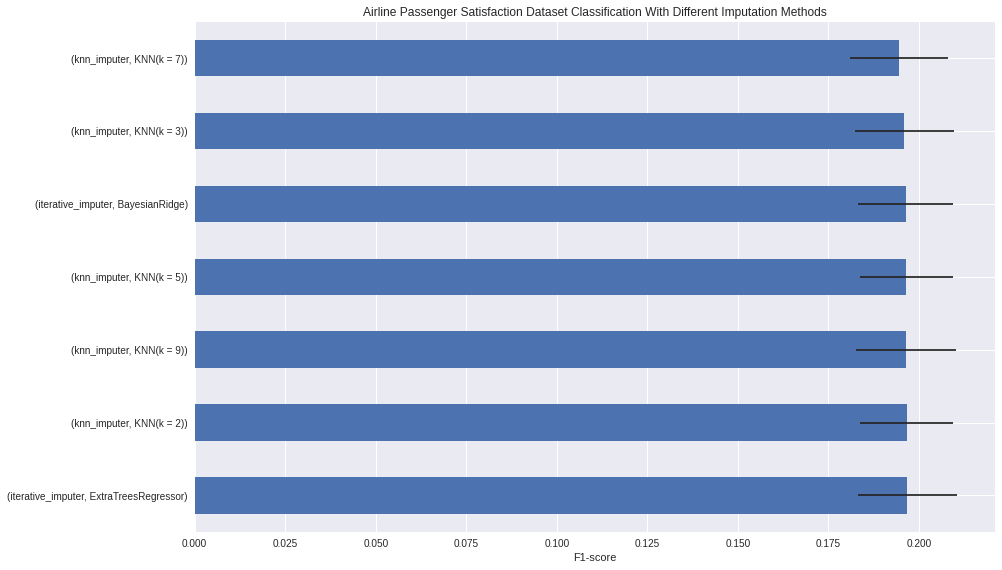

In [ ]:
# Set global configs
cv = 5
scoring = "f1"
state = 10
forest = RandomForestClassifier(random_state=0)

# Store IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [BayesianRidge(), ExtraTreesRegressor()]:
    pipe = make_pipeline(
        IterativeImputer(estimator=estimator, random_state=state), forest
    )
    ii_scores[estimator.__class__.__name__] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2, 3, 5, 7, 9]
for k in n_neighbors:
    pipe = make_pipeline(KNNImputer(n_neighbors=k), forest)
    knn_scores[f"KNN(k = {k})"] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Combines scores into a single DF
final_scores = pd.concat(
    [ii_scores, knn_scores],
    axis=1,
    keys=["iterative_imputer", "knn_imputer"],
)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

means, errors = final_scores.mean().sort_values(ascending=False), final_scores.std()
means.plot.barh(xerr=errors, ax=ax)

ax.set_title("Airline Passenger Satisfaction Dataset Classification With Different Imputation Methods")
ax.set_xlabel("F1-score")
ax.set_yticks(np.arange(means.shape[0]))

plt.tight_layout(pad=1)
plt.show();

In [ ]:
means

iterative_imputer  ExtraTreesRegressor    0.196780
knn_imputer        KNN(k = 2)             0.196561
                   KNN(k = 9)             0.196519
                   KNN(k = 5)             0.196424
iterative_imputer  BayesianRidge          0.196384
knn_imputer        KNN(k = 3)             0.196001
                   KNN(k = 7)             0.194461
dtype: float64

Karena kita hanya menggunakan **2 feature dalam cross validation**, maka f1-score yang didapat pun cukup rendah. Namun, kita dapat melihat bahwa kemungkinan terbaik adalah menggunakan **Iterative Imputer dengan model ExtraTreesRegressor dan random_state 10**. Maka kita akan melakukan imputing tersebut.
<br><br>

**References :**
- https://youtu.be/m_qKhnaYZlc


In [20]:
# Define imputer
imp_it = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=10)

# Choose columns
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']] = imp_it.fit_transform(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']])

df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25.0,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11.0,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3.0,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7.0,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0.0,0


### Check Missing Value

In [21]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

`Arrival Delay in Minutes` berhasil di impute, namun kita melihat bahwa baik feature `Departure` maupun `Arrival` berubah bentuknya menjadi *float* akibat proses imputing.

Oleh karena itu, kita akan mengubah keduanya ke dalam bentuk *int* sesuai bentuk awal feature `Departure`.

In [23]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(int)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
print(df['Departure Delay in Minutes'].dtype, df['Arrival Delay in Minutes'].dtype)

int64 int64


Missing values berhasil di handle dan tipe data telah diperbaiki. Kemudian, kita akan menganalisa kondisi dataset.

## Handling Outlier

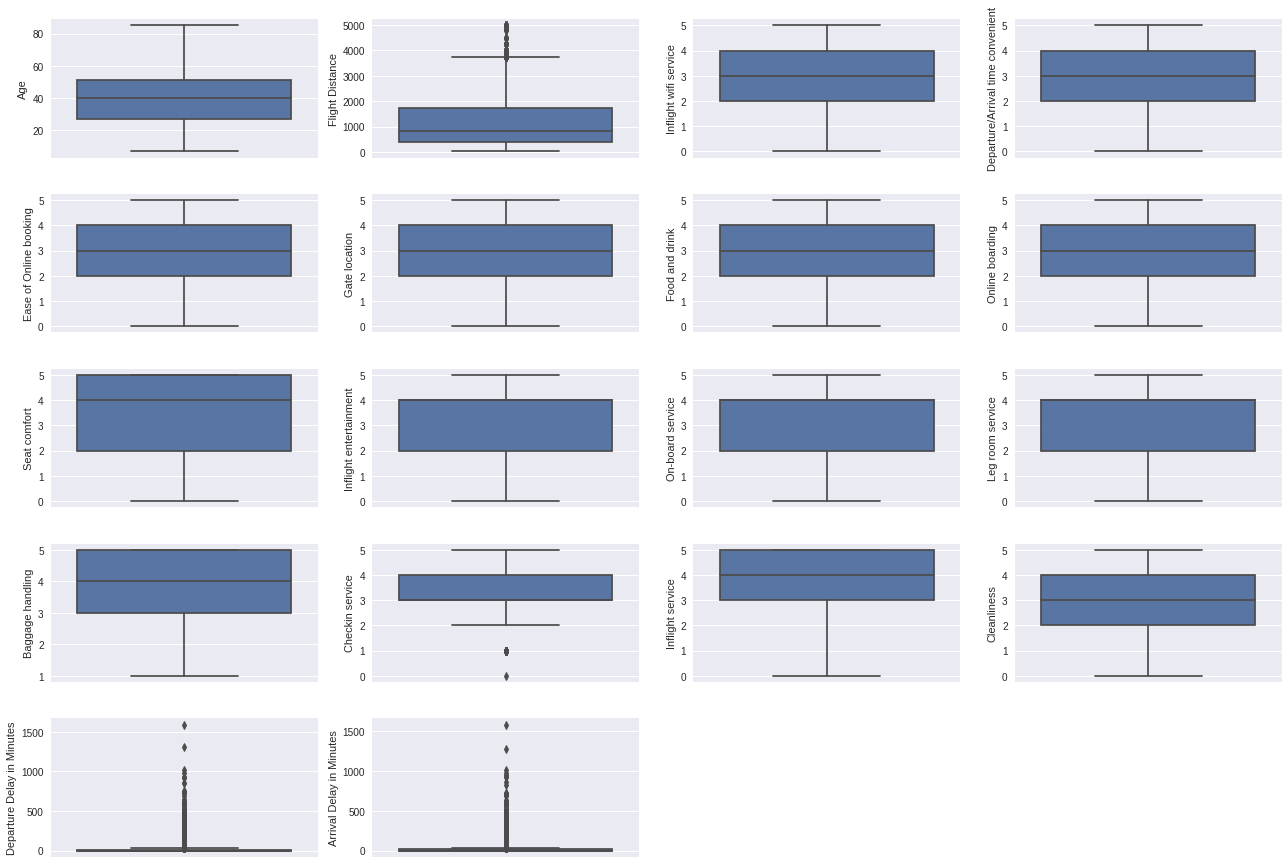

In [24]:
numerical_features = df.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()

fig = plt.figure(figsize=(18,22))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

Terlihat bahwa feature `Flight Distance` dan `Delay` (baik Departure maupun Arrival) memiliki jumlah outlier yang banyak. Berdasarkan *domain knowledge*, kita dapat memahami bahwa `Delay` tentunya punya pengaruh terhadap tingkat `satisfaction` pelanggan. Kita dapat memastikan juga jumlah informasi yang dari outlier yang kita singkirkan dengan menggunakan **IQR**.

### Check Outlier

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                    24.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                            1.0
dtype: float64


In [26]:
# Test removing outliers from dataset
df_test = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show percentage
rest = round(100 - (df_test.shape[0] / df.shape[0]*100), 2)
print(f'Kisaran data yang terbuang: {rest}%')

Kisaran data yang terbuang: 27.88%


Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


**Hampir 30%** dari data terbuang jika kita langsung menghapus outlier dari features yang ada, oleh karena itu kita akan tetap menyimpan **outlier**.

## Dataset Condition

### Check Duplicate

Kita akan mulai terlebih dahulu dengan memastikan apakah terdapat **data duplikat**.

In [27]:
#Check Duplicated value
df[df.duplicated()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


### Check Balance

Terbukti kalau tidak ada baris yang **terduplikat**, kita juga akan memastikan apakah dataset *balanced*.

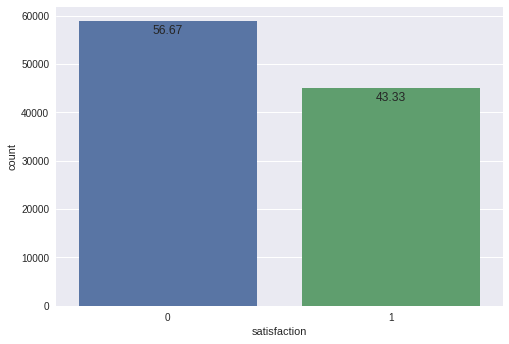

In [28]:
# Count the number of customers in neutral or dissatisfied | satisfied
ax = sns.countplot(x='satisfaction', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/103904)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

Terlihat dari graph bahwa pembagian data antar 2 kelompok **termasuk balanced (dengan perbandingan 57:43)** sehingga tidak perlu dilakukan metode tambahan untuk membuat data menjadi balanced.
<br><br>

Selanjutnya, kita akan melakukan **feature engineering** untuk melengkapi dataset dengan harapan modelling akan semakin baik.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

## Feature Engineering

Di projek ini kita akan menambahkan beberapa feature baru agar bisa mendapatkan insight yang lebih dalam.

1. Total delay = departure delay + arrival delay
2. Overall customer satisfaction = average score of all rating
3. Pre-flight experience = Ease of online booking, Online boarding, Departure/Arrival time convenient
4. Airport experience = Checkin service, Baggage handling, Gate location
5. Inflight experience = Cleanliness, Inflight wifi service, Inflight service, Leg room service, Inflight entertainment, Seat comfort, Food and drink, On-board service

### Total Delay


In [30]:
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

### Overall customer satisfaction

In [31]:
df['Overall Satisfaction'] = round(df[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].mean(axis=1),2)

### Pre-flight Experience

In [32]:
df['Pre-flight Experience'] = round(df[['Ease of Online booking','Online boarding','Departure/Arrival time convenient']].mean(axis=1),2)

### Airport Experience

In [33]:
df['Airport Experience'] = round(df[['Checkin service','Baggage handling','Gate location']].mean(axis=1),2)

### Inflight Experience

In [34]:
df['Inflight Experience'] = round(df[['Cleanliness','Inflight wifi service','Inflight service','Leg room service','Inflight entertainment','Seat comfort','Food and drink','On-board service']].mean(axis=1),2)

In [35]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,43,3.86,3.33,3.00,4.38
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,7,2.29,2.67,2.33,2.12
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,0,3.71,3.00,3.33,4.12
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,0,20,3.00,4.00,3.00,2.62
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1,0,3.50,3.67,3.33,3.50


### Reorder Columns

Setelah kita berhasil menambahkan kelima feature tersebut, maka kita akan memindahkan kolom satisfaction kembali di akhir sehingga lebih mudah dimengerti saat ditampilkan.

In [36]:
cols_at_end = ['satisfaction']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,43,3.86,3.33,3.00,4.38,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,7,2.29,2.67,2.33,2.12,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,3.71,3.00,3.33,4.12,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,20,3.00,4.00,3.00,2.62,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,0,3.50,3.67,3.33,3.50,1


## Multicollinearity
Dengan ditambahkannya feature baru yang merupakan gabungan dari beberapa feature yang ada, kita perlu melakukan tes multicollinearity utnuk mengetahui apakah ada hubungan linear antar feature dan memungkinkan terjadinya overfitting. Dan jika diperlukan, akan mengurangi feature yang akan digunakan dalam model nantinya.

Dalam hal ini kita akan menghitung nilai VIF.



### Heatmap
Pada bagian ini kita akan coba buat heatmapnya untuk melihat korelasi antar feature.

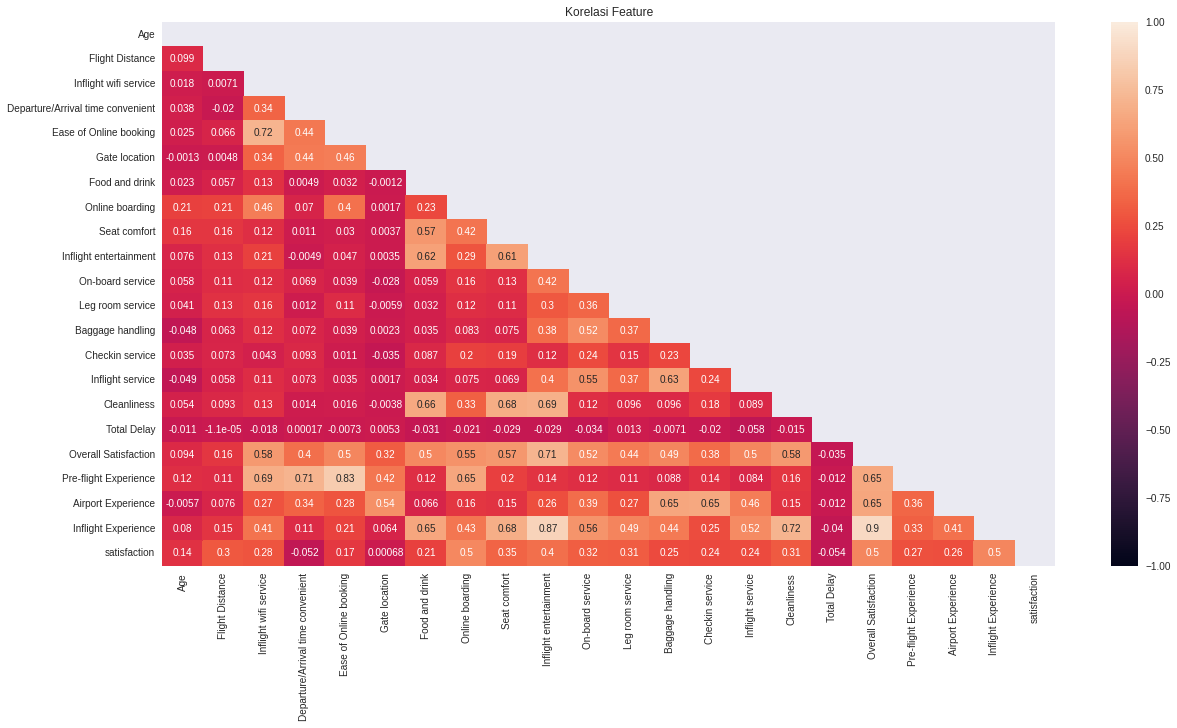

In [ ]:
plt.figure(figsize=(20,10))

# Kita buat mask jadi yang terlihat hanya bagian bawah
mask = np.triu(np.ones_like(df.corr(),dtype=bool))

# Heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Korelasi Feature')
plt.show()

Jika dilihat dari heatmap ada beberapa feature yang mempunyai korelasi kuat. 

Beberapa diantaranya adalah:
- `Pre-flight Experience` vs `Ease of Online booking`
- `Inflight Experience` vs `Inflight entertainment`
- `Arrival Delay in Minutes` vs `Departure Delay in Minutes`
- `Total Delay` vs `Arrival Delay in Minutes`
- `Total Delay` vs `Departure Delay in Minutes`
- `Inflight Experience` vs `Overall Satisfaction`


Kita akan cek lagi nilai VIF-nya untuk melihat lebih jelas multicollinearity yang ada pada dataset ini.

### Variance Inflation Factor (VIF)

Kami akan menggunakan angka 10 sebagai threshold, dimana jika angkanya diatas 10 maka dapat disimpulkan ada multicollinearity kuat antara feature tersebut

In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

calc_vif(df.select_dtypes(include=['int','float']).drop(columns='satisfaction'))

divide by zero encountered in double_scalars


,variable,VIF
0,Age,7.237730e+00
1,Flight Distance,2.647097e+00
2,Inflight wifi service,1.726172e+04
3,Departure/Arrival time convenient,2.036059e+05
4,Ease of Online booking,1.664831e+05
5,Gate location,1.638921e+05
6,Food and drink,2.251488e+04
7,Online boarding,2.155542e+05
8,Seat comfort,2.541911e+04
9,Inflight entertainment,2.446395e+04


Seperti yang bisa kita lihat diatas bahwa adanya angka infinite pada feature `Departure Delay in Minutes, Arrival Delay in Minutes, dan Total Delay.`

Untuk mengatasi hal ini kita akan mencoba untuk drop feature `Departure Delay in Minutes dan Arrival Delay in Minutes`. Kami memutuskan untuk menghapus feature ini karena pada kedua feature hubungannya linear dan `Total Delay` sudah bisa menggambarkan keseluruhan delay experience bagi pelanggan.

In [ ]:
# Kita coba hitung lagi vif dengan feature yang sudah dihapus
calc_vif(df.select_dtypes(include=['int','float']).drop(columns=['satisfaction', 'Departure Delay in Minutes','Arrival Delay in Minutes']))

,variable,VIF
0,Age,7.237586e+00
1,Flight Distance,2.646743e+00
2,Inflight wifi service,1.726155e+04
3,Departure/Arrival time convenient,2.036059e+05
4,Ease of Online booking,1.664830e+05
5,Gate location,1.638921e+05
6,Food and drink,2.251465e+04
7,Online boarding,2.155542e+05
8,Seat comfort,2.541886e+04
9,Inflight entertainment,2.446370e+04


Setelah dilakukan analisa multicollinearity kita hanya perlu menghapus feature Departure Delay in Minutes dan Arrival Delay in Minutes, dimana sudah bisa diwakili dengan feature Total Delay.

In [37]:
# Drop columns
df.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)

# Check dataset 
df.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43,3.86,3.33,3.00,4.38,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7,2.29,2.67,2.33,2.12,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,3.71,3.00,3.33,4.12,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20,3.00,4.00,3.00,2.62,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,3.50,3.67,3.33,3.50,1


# EDA

Setelah data berhasil kita proses, maka kita akan melakukan **exploratory data analysis** untuk memahami lebih lanjut akan dataset yang kita pakai.

In [38]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Gender,object,0,0.0,2,"[Male, Female]"
1,Customer Type,object,0,0.0,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,0,0.0,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
3,Type of Travel,object,0,0.0,2,"[Personal Travel, Business travel]"
4,Class,object,0,0.0,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,int64,0,0.0,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
6,Inflight wifi service,int64,0,0.0,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,int64,0,0.0,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,int64,0,0.0,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,int64,0,0.0,6,"[1, 3, 2, 5, 4, 0]"


## Data Distribution

Bagian ini akan berfokus kepada penyebaran data tiap `features` terlebih dahulu.

 ### Numerical Features

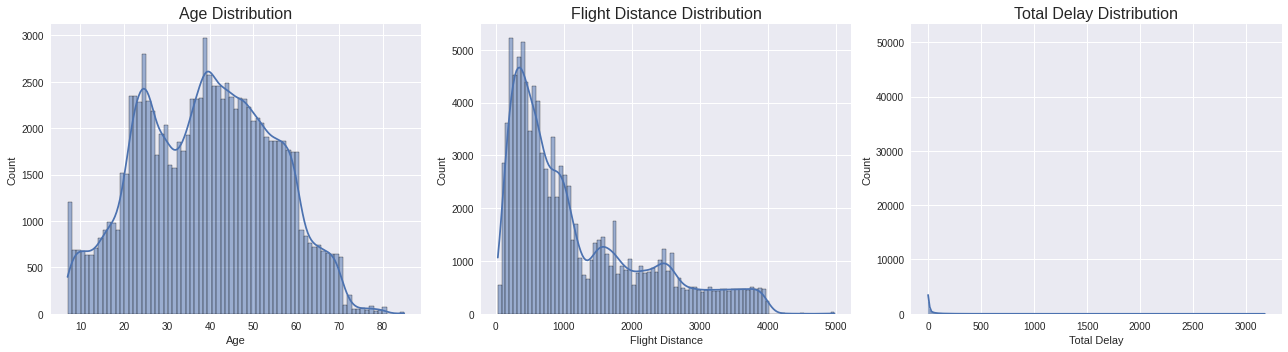

In [ ]:
fig = plt.figure(figsize=(18,5))
count = 0

for i in df[['Age','Flight Distance','Total Delay']].columns:
    count +=1
    ax= plt.subplot(1,3,count)
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'{i} Distribution',fontsize=16)
    fig.tight_layout()

plt.show()

**Analisis :**
- `Age`: Penyebaran data cukup merata dari umur dibawah 10 sampai dengan umur di atas 80, meskipun paling banyak terdapat di range 35-50 tahun.
- `Flight Distance`: Paling banyak penerbangan yang berjarak dibawah 1000 miles.
- `Total Delay`: Paling banyak jumlah delay di range 0-50 menit.

### Categorical Features

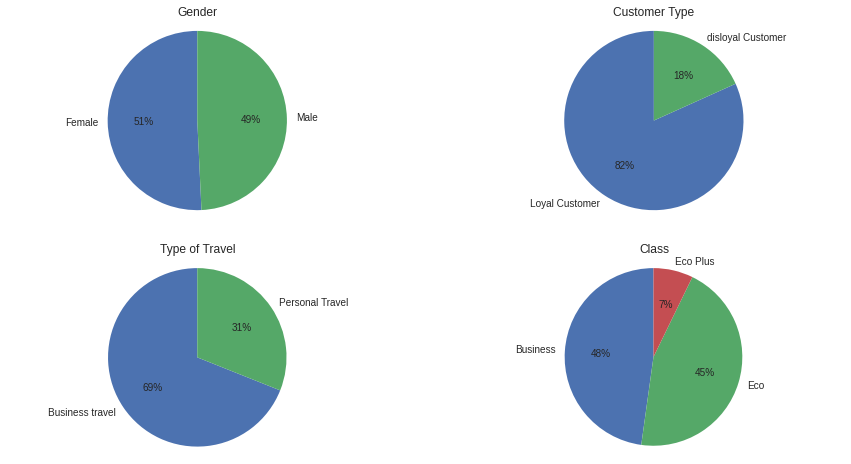

In [ ]:
df_cat = df[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
for i, col in enumerate(df_cat):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

Beberapa grafik di atas adalah persebaran feature kategorikal. Analisis lebih lanjut akan ditampilkan bersamaan dengan hubungan tiap `feature` terhadap `satisfaction`.

### Customer Experience/Satisfaction Features

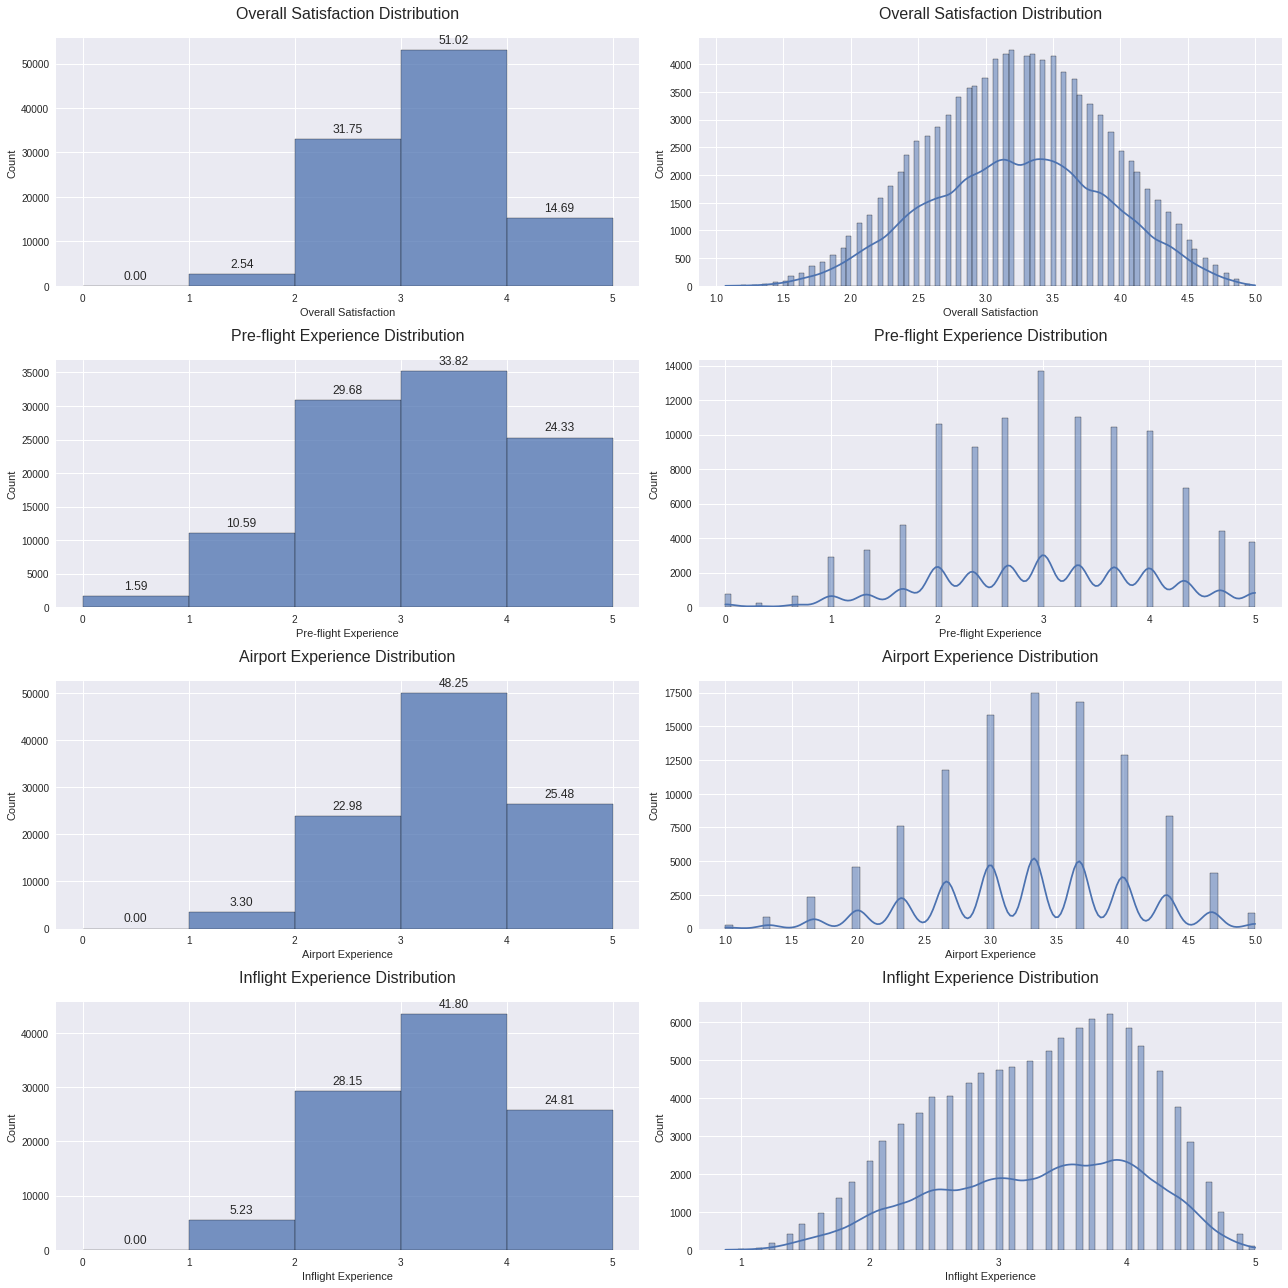

In [ ]:
fig = plt.figure(figsize=(18,18))
bin=[0, 1, 2, 3, 4, 5]
count = 0

for i in df[['Overall Satisfaction', 'Pre-flight Experience', 'Airport Experience', 'Inflight Experience']].columns:
    count +=1
    ax= plt.subplot(4,2,count)
    sns.histplot(data=df,x=i,bins=bin)
    plt.title(f'{i} Distribution',fontsize=16, pad=20)

    for a in ax.patches:
      ax.annotate(format((a.get_height()/103904)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 10),textcoords='offset points')
    
    count +=1
    ax= plt.subplot(4,2,count)
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'{i} Distribution',fontsize=16, pad=20)

    fig.tight_layout()

plt.show()

**Analisis :**
- `Overall`: Secara umum, ternyata pelanggan memiliki tingkat kepuasan tertinggi dari servis yang ditawarkan pada range angka 3-4.
- `Pre-Fligt, Airport, Inflight`: Lebih dari 50% pelanggan mengalami tingkat kepuasan di atas 3, namun mereka memiliki tingkat kepuasan tertinggi dari `Airport Experience`.

## Multiple Data

### Customer Type by Class and Type of Travel

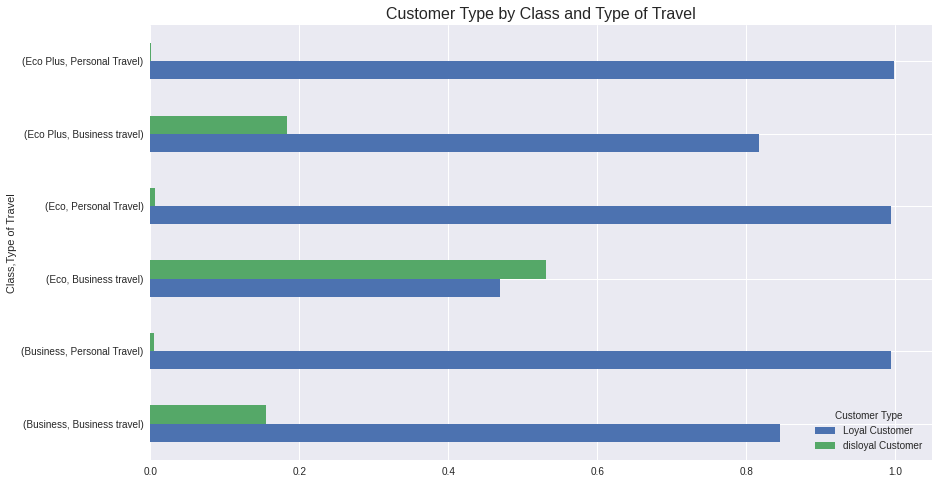

In [ ]:
type_class = pd.crosstab(columns=df['Customer Type'],index=[df['Class'],df['Type of Travel']], margins=False, normalize='index')

type_class.plot(kind='barh', figsize=(14,8))
plt.title('Customer Type by Class and Type of Travel', size=16)

plt.show()

**Analisis :**
- Kebanyakan pelanggan yang melakukan personal travel merupakan pelanggan setia.
- Pelanggan yang melakukan business travel dengan kelas Eco merupakan pelanggan tidak setia terbanyak.

### Class by Flight Distance

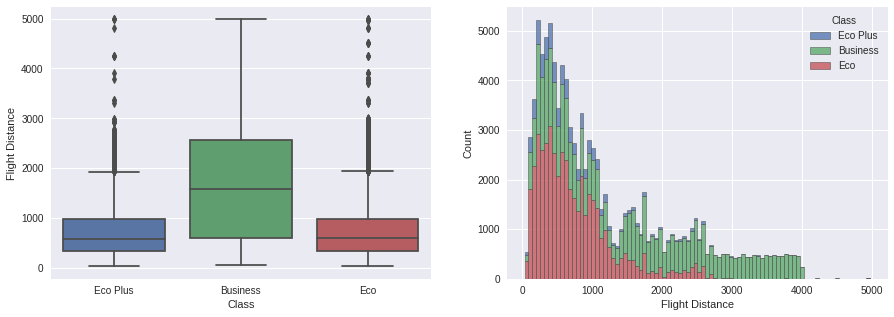

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.show()

**Analisis :**
- Pelanggan dengan penerbangan yang jauh cenderung mengambil penerbangan kelas Business. 
- Tentunya kelas Business akan menawarkan penerbangan yang lebih nyaman sehingga tepat untuk penerbangan panjang.

### Class by Type of Travel

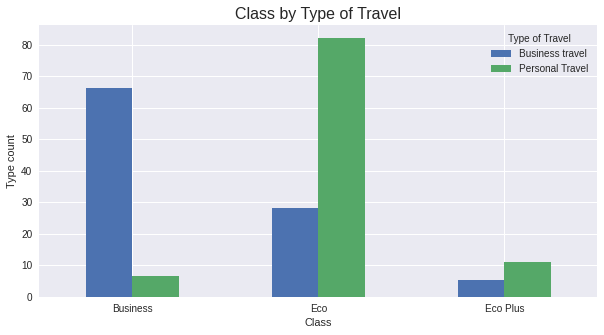

In [ ]:
type_class = pd.crosstab(df['Class'], df['Type of Travel']).apply(lambda x:x/x.sum()*100)

type_class.plot(kind='bar', figsize=(10,5))

plt.title('Class by Type of Travel', size=16)
plt.ylabel('Type count')
plt.xticks(rotation='horizontal')
plt.show()

**Analisis :**
- Pelanggan yang mengambil penerbangan kelas Business cenderung memiliki tujuan sehubungan bisnis.

### Satisfaction by Numerical Features

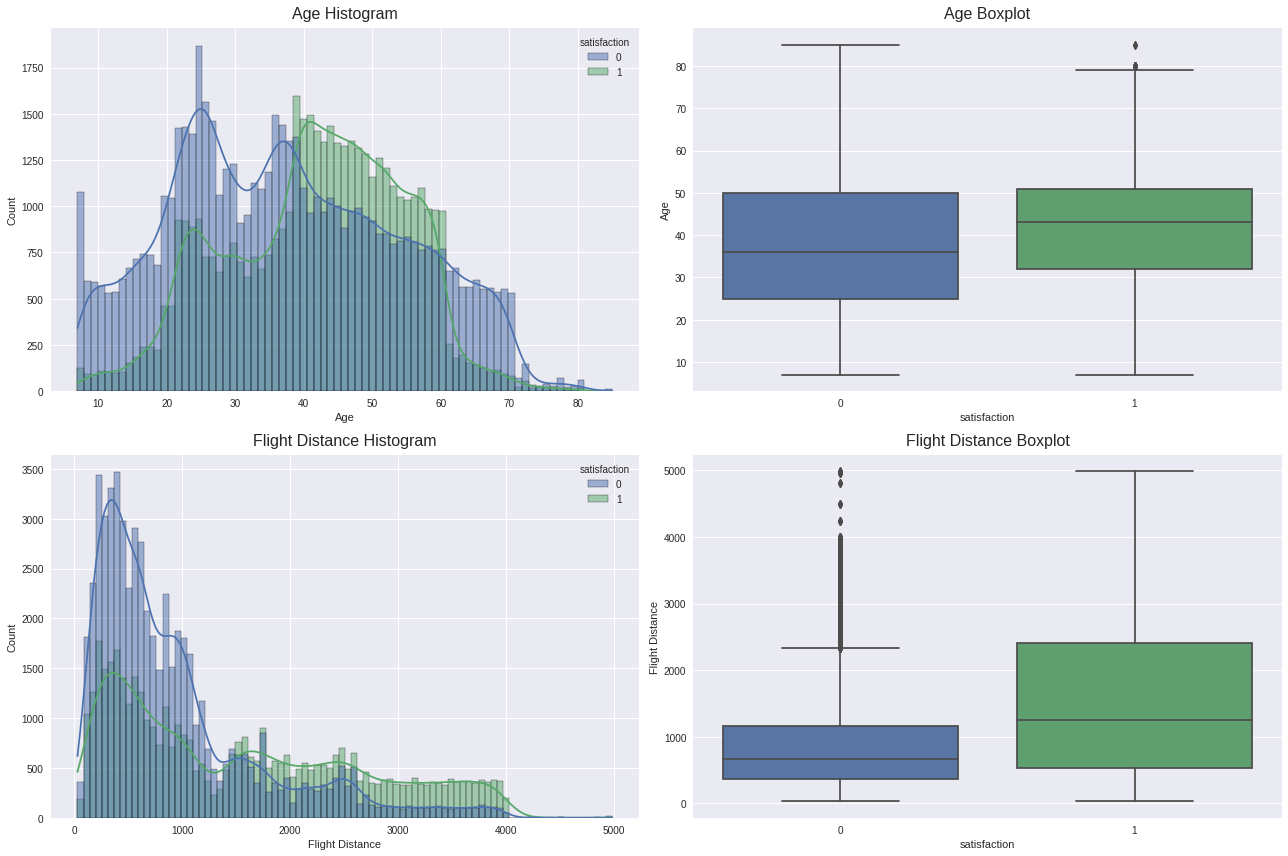

In [ ]:
fig = plt.figure(figsize=(18,12))
count = 0

for i in df[['Age', 'Flight Distance']].columns:
    count +=1
    ax= plt.subplot(2,2,count)
    sns.histplot(data=df,x=i,hue='satisfaction',kde=True)
    plt.title(f'{i} Histogram',fontsize=16, pad=10)

    count +=1
    ax= plt.subplot(2,2,count)
    sns.boxplot(data=df,y=i, x='satisfaction')
    plt.title(f'{i} Boxplot',fontsize=16, pad=10)
    fig.tight_layout()

plt.show()

**Analisis :**
- Umur pelanggan yang puas relatif lebih tua dibanding yang tidak. Hal ini juga mungkin berpengaruh pada loyalitas pelanggan.
- Pelanggan yang berpegian jauh relatif lebih puas dibanding yang tidak. Hal ini terlihat dari kebanyakan pelanggan dengan penerbangan jauh mengambil business class, yang dimana menjamin tingkat kepuasan lebih tinggi.

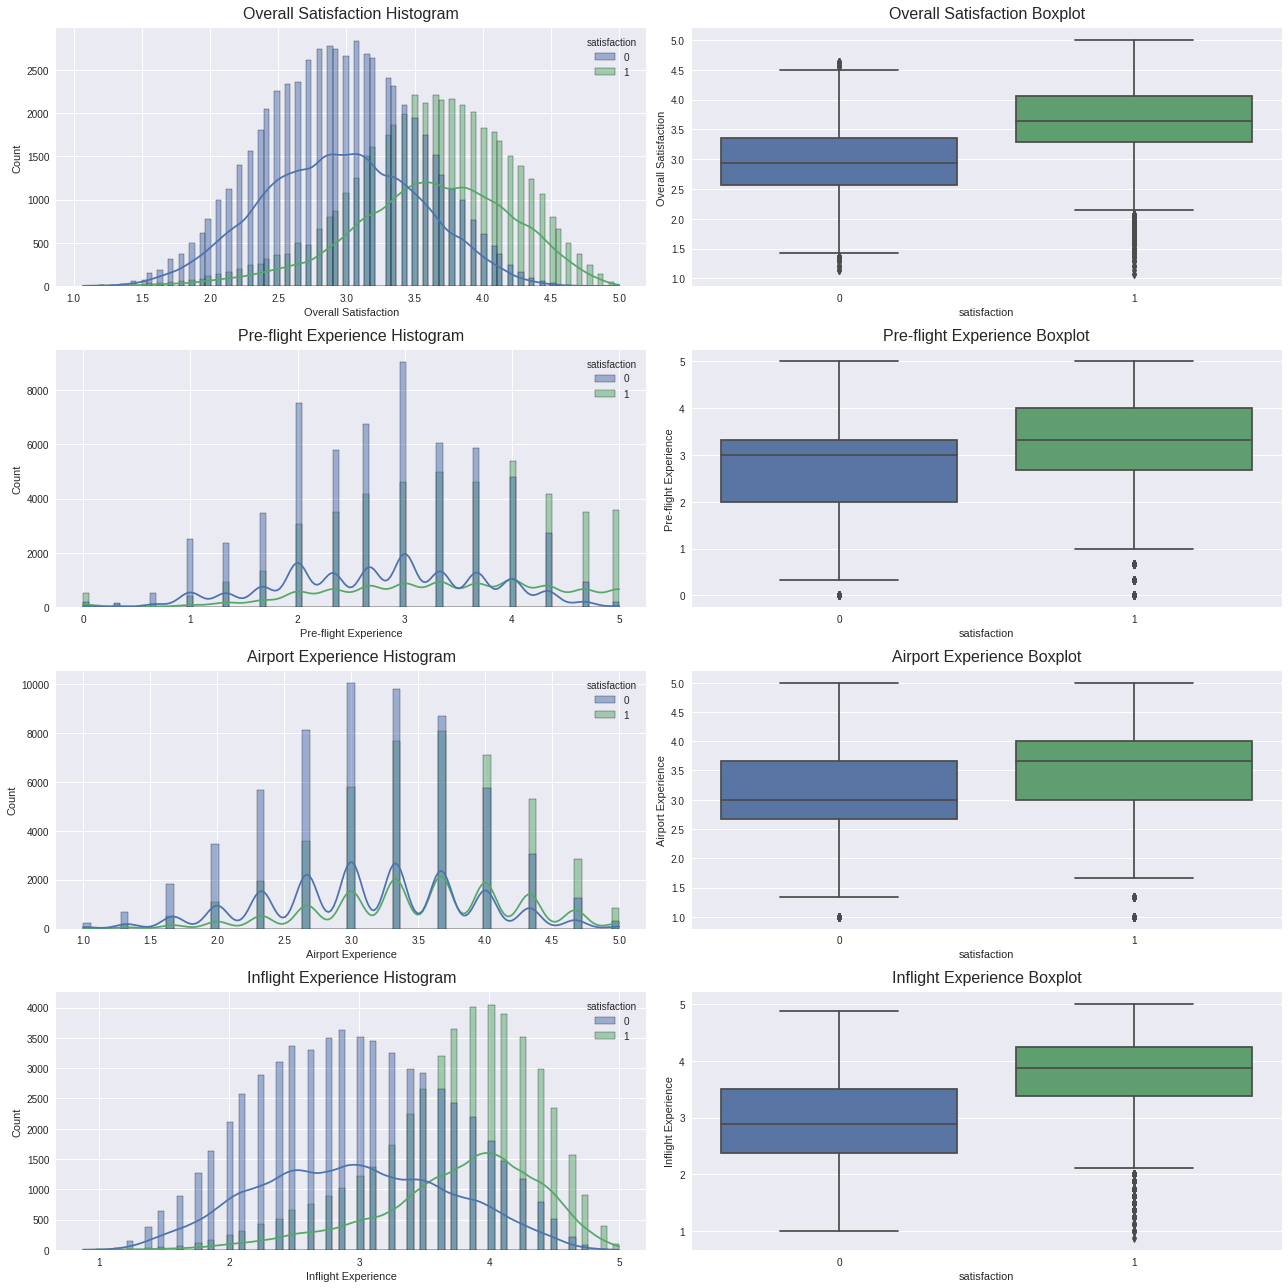

In [ ]:
fig = plt.figure(figsize=(18,18))
count = 0

for i in df[['Overall Satisfaction', 'Pre-flight Experience', 'Airport Experience', 'Inflight Experience']].columns:
    count +=1
    ax= plt.subplot(4,2,count)
    sns.histplot(data=df,x=i,hue='satisfaction',kde=True)
    plt.title(f'{i} Histogram',fontsize=16, pad=10)

    count +=1
    ax= plt.subplot(4,2,count)
    sns.boxplot(data=df,y=i, x='satisfaction')
    plt.title(f'{i} Boxplot',fontsize=16, pad=10)
    fig.tight_layout()

plt.show()

**Analisis :**
- Secara logika, pelanggan yang memberi nilai tinggi terhadap pelayanan yang diberikan berarti akan lebih puas.
- Terbukti dari beberapa grafik di atas bahwa semakin tinggi tingkat kepuasan yang dialami oleh seorang pelanggan ketika melakukan penerbangan, semakin tinggi pula kemungkinan pelanggan tersebut masuk dalam kelompok puas.

### Satisfaction by Categorical Features

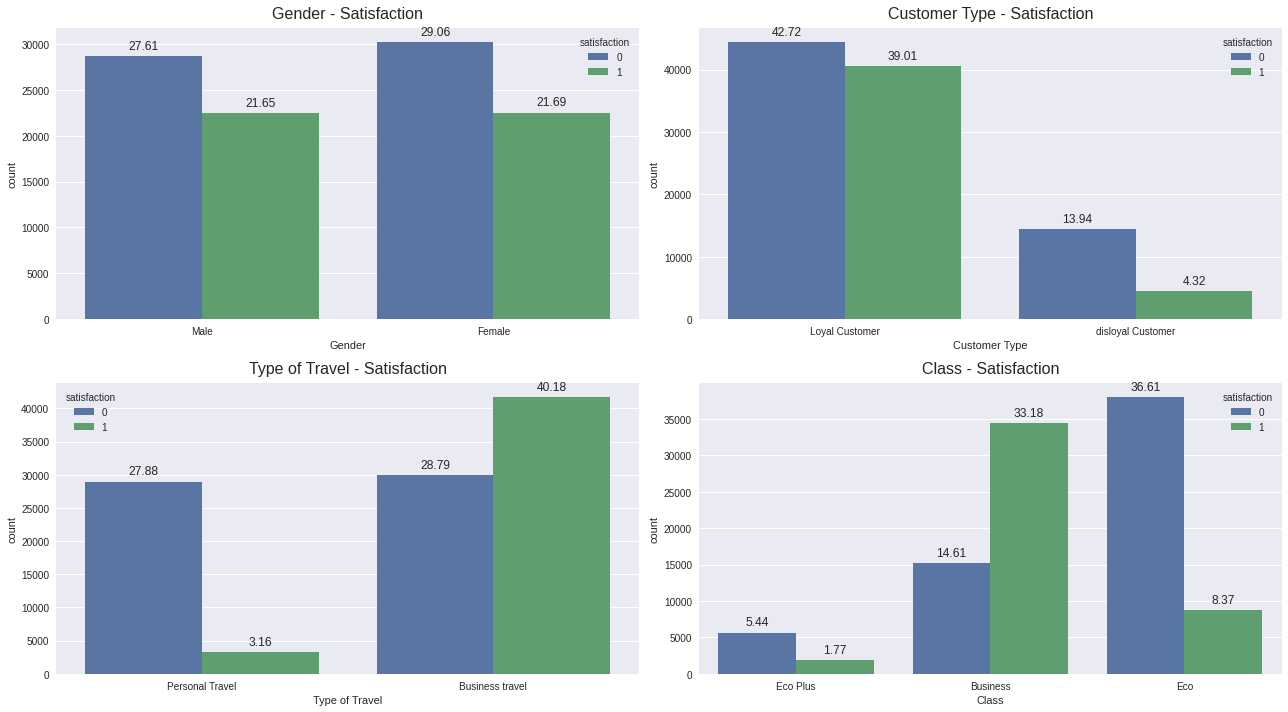

In [ ]:
fig = plt.figure(figsize=(18,10))
count = 0

for i in df[['Gender','Customer Type','Type of Travel','Class']].columns:
    count +=1
    ax= plt.subplot(2,2,count)
    sns.countplot(data=df, x=i, hue='satisfaction')
    plt.title(f"{i} - Satisfaction", fontsize=16, pad=10)
    fig.tight_layout()

    for a in ax.patches:
      ax.annotate(format((a.get_height()/103904)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 10),textcoords='offset points')

plt.show()

**Analisis :**
- `Gender`: Tidak ada perbedaan signifikan berdasarkan gender, baik untuk jumlah maupun tingkat kepuasan yang dirasakan tiap kelompok.
- `Customer Type`: Meskipun 82% dari pelanggan ternyata termasuk pelanggan loyal, namun pelanggan yang puas terbagi secara rata.
- `Type of Travel`:
  - Mayoritas pelanggan yang menggunakan airline ini untuk tujuan bisnis. Terlihat juga bahwa kebanyakan dari mereka termasuk pelanggan yang puas.
  - Hal ini terbukti dari tabel sebelumnya bahwa kebanyakan pelanggan dengan tujuan bisnis mengambil business class, sehingga lebih kemungkinan masuk dalam kelompok puas.
- `Satisfaction`:
  - Customer lebih banyak mengambil kelas Business dan Eco dibanding dengan Eco Plus.
  - Jumlah pelanggan yang puas hampir berbanding terbalik antar kedua kelas, dimana terdapat lebih banyak pelanggan yang puas di kelas Business.

### Satisfaction & Class by Age Group

In [39]:
# Buat dataset baru (agar tidak mengubah dataset awal) dimana kita akan buat kolom baru yang diisi dengan gruping usia
df2 = df.copy()

# Bagi age menjadi beberapa bin
list2 = [df2]
for column in list2:
    column.loc[column['Age'] < 30, 'Age group'] = 20  # Usia 0-29 akan masuk ke grup 20
    column.loc[(column['Age'] >=30) & (column['Age'] <= 39), 'Age group'] = 30  # Usia 30-39 akan masuk grup 30
    column.loc[(column['Age'] >=40) & (column['Age'] <= 49), 'Age group'] = 40  # Usia 40-49 akan masuk grup 40
    column.loc[(column['Age'] >=50) & (column['Age'] <= 59), 'Age group'] = 50  # Usia 50-59 akan masuk grup 50
    column.loc[(column['Age'] >= 60), 'Age group'] = 60  # Usia >=60 masuk ke grup 60

df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience,satisfaction,Age group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43,3.86,3.33,3.00,4.38,0,20.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7,2.29,2.67,2.33,2.12,0,20.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,3.71,3.00,3.33,4.12,1,20.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20,3.00,4.00,3.00,2.62,0,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,3.50,3.67,3.33,3.50,1,60.0


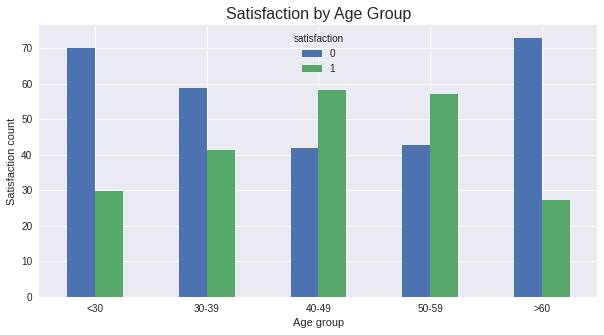

In [ ]:
# Buat crosstab untuk menghitung persentase satisfaction rate
age_group = pd.crosstab(df2['satisfaction'], df2['Age group']).apply(lambda x:x/x.sum()*100)

# Transpose
age_group = age_group.T

age_group.plot(kind='bar', figsize=(10,5))

plt.title('Satisfaction by Age Group', size=16)
plt.ylabel('Satisfaction count')
plt.xticks(np.arange(5),('<30','30-39','40-49','50-59','>60'), rotation='horizontal')
plt.show()

**Analisis :**
- Dari chart diatas dapat terlihat cukup jelas bahwa kebanyakan dari grup usia merasa netral atau tidak puas dengan layanan maskapai, terlebih pada grup usia <30 & >60.

- Pada grup 40-49 dan 50-59 kebanyakan puas dengan pelayanan maskapai. 

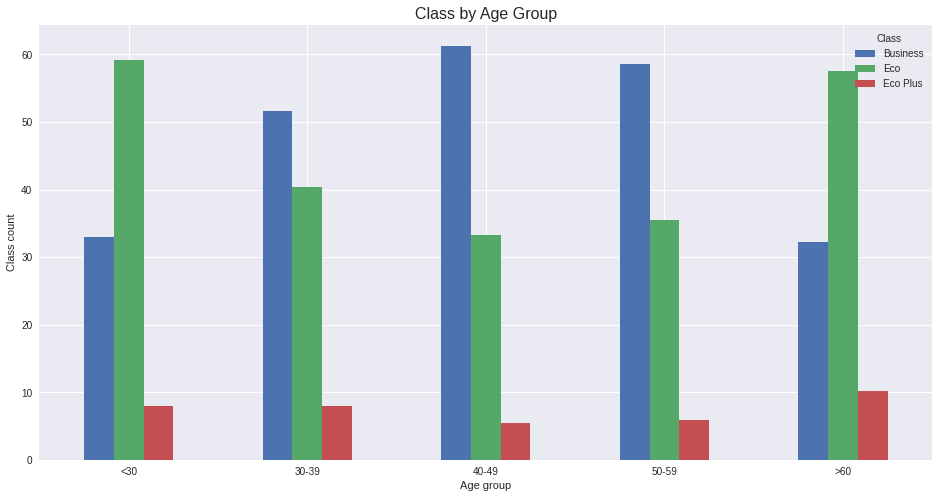

In [ ]:
# Buat crosstab untuk menghitung persentase class pada age group
age_class = pd.crosstab(df2['Class'], df2['Age group']).apply(lambda x:x/x.sum()*100)

# Transpose
age_class = age_class.T

age_class.plot(kind='bar', figsize=(16,8))

plt.title('Class by Age Group', size=16)
plt.ylabel('Class count')
plt.xticks(np.arange(5),('<30','30-39','40-49','50-59','>60'), rotation='horizontal')
plt.show()

**Analisis :**
- Ternyata memang terlihat bahwa grup <30 & >60 kebanyakan menaiki kelas Eco, oleh karena itu kita bisa mengetahui bahwa ada hal yang menyebabkan ketidak puasan pada kelas ini.

- Begitu juga pada kelas 40-90 & 50-59, dimana pada kedua grup tersebut kebanyakan menaiki kelas Business, bisa diketahui bahwa pada kelas Business banyak hal yang menyebabkan kepuasan penumpang.

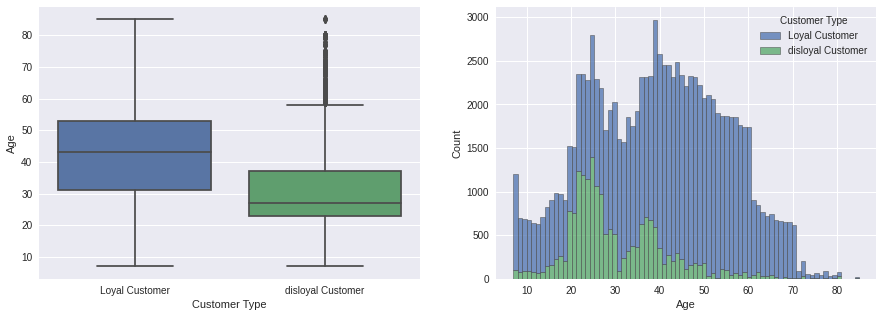

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.show()

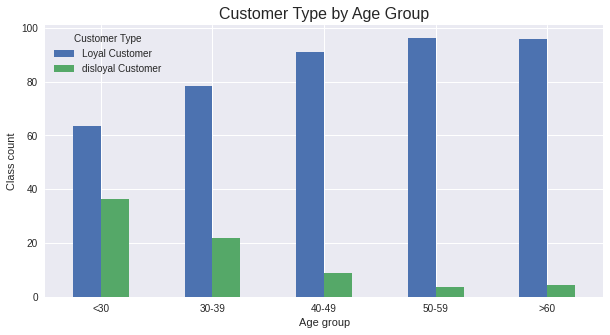

In [ ]:
# Buat crosstab untuk menghitung persentase class pada age group
age_type = pd.crosstab(df2['Customer Type'], df2['Age group']).apply(lambda x:x/x.sum()*100)

# Transpose
age_type = age_type.T

age_type.plot(kind='bar', figsize=(10,5))

plt.title('Customer Type by Age Group', size=16)
plt.ylabel('Class count')
plt.xticks(np.arange(5),('<30','30-39','40-49','50-59','>60'), rotation='horizontal')
plt.show()

**Analisis :**
- Umur pelanggan yang loyal relatif lebih tua dibanding yang tidak.
- Kelompok pelanggan yang tidak loyal kebanyakan berada di bawah umur 30 tahun.
- Hal ini mungkin disebabkan oleh pelanggan yang lebih muda cenderung mencari penerbangan yang lebih murah, sehingga tidak ada preferensi penerbangan tertentu.

### Satisfaction by Total Delay

Kita juga akan mencoba untuk melihat hubungan delay dengan kepuasan pelanggan

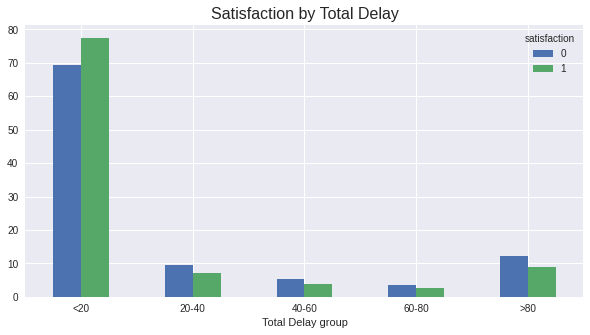

In [ ]:
# Bagi Total Delay menjadi beberapa bin untuk mempermudah interpretasi data
list2 = [df2]
for column in list2:
    column.loc[column['Total Delay'] < 21, 'Total Delay group'] = 20  # Total delay 0-20 akan masuk ke grup 20
    column.loc[(column['Total Delay'] >=21) & (column['Total Delay'] <= 40), 'Total Delay group'] = 40  # Total delay 21-40 akan masuk grup 40
    column.loc[(column['Total Delay'] >=41) & (column['Total Delay'] <= 60), 'Total Delay group'] = 60  # Total delay 41-60 akan masuk grup 60
    column.loc[(column['Total Delay'] >=61) & (column['Total Delay'] <= 80), 'Total Delay group'] = 80  # Total delay 61-80 akan masuk grup 80
    column.loc[(column['Total Delay'] >= 81), 'Total Delay group'] = 90  # Total delay >=80 masuk ke grup 90


# Buat crosstab 
delay_satisfaction = pd.crosstab(df2['Total Delay group'], df2['satisfaction']).apply(lambda x:x/x.sum()*100)

# Transpose
delay_satisfaction.T

delay_satisfaction.plot(kind='bar', figsize=(10,5))

plt.title('Satisfaction by Total Delay', size=16)
plt.xticks(np.arange(5),('<20','20-40','40-60','60-80','>80'), rotation='horizontal')
plt.show()


**Analisis :**
- Dari chart diatas bisa kita lihat bahwa jika total delay masih dibawah 20 menit, maka pelanggan yang puas masih lebih tinggi jumlahnya dibandingkan dengan yang tidak puas.
- Sedangkan diatas 20 menit jumlah pelanggan yang tidak puas menjadi lebih banyak dibandingkan dengan yang puas.

### Detailed Customer Experience Satisfaction per Class

Pada tahap ini kita akan melihat tingkat kepuasan pada class namun sesuai dengan experiencenya (pre-flight, airport, in-flight)

#### Pre-Flight Experience

Pre-flight Experience meliputi:
- Ease of online booking
- Online boarding
- Departure/Arrival time convenient

Text(0, 0.5, 'Satisfaction level')

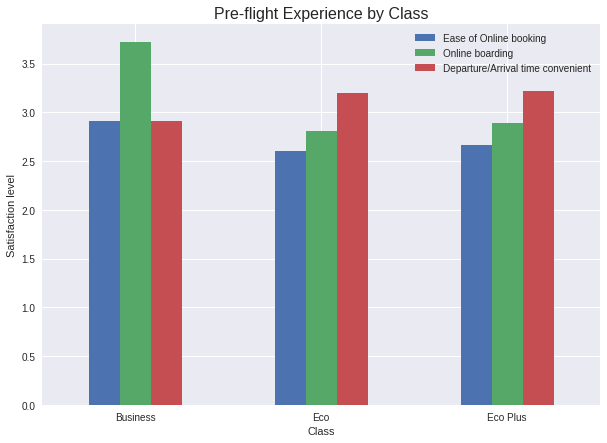

In [ ]:
pre_flight = df2.groupby(['Class'])[['Ease of Online booking','Online boarding','Departure/Arrival time convenient']].mean()

pre_flight.plot(kind='bar',figsize=(10,7))

plt.title('Pre-flight Experience by Class', size=16)
plt.xticks(rotation='horizontal')
plt.ylabel('Satisfaction level')

**Analisis :**
- Kita lihat dari kelas Business, terlihat bahwa penumpang cukup puas dengan `online boardingnya`, namun untuk service lainnya tidak bisa melebihi nilai netral.

- `Departure/Arrival time convenient` juga dibawah dari class lainnya, sedangkan kepuasan online boarding jauh dari class lain.

- Dari data ini kita bisa lihat bahwa kelebihan pre-flight experience kelas Business adalah dari `online boarding` dan `ease of online booking`, sedangkan untuk `departure/arrival time convenient` bisa dilakukan improvement.

- Pada kelas Eco dan Eco Plus, tingkat kepuasannya serupa, dimana pada kedua kelas cukup puas dengan `departure/arrival time convenient`. Sedangkan perlu adanya improvement pada `ease of online booking` dan `online boarding`.

#### Airport Experiece

Airport Experience meliputi:
- Checkin service
- Baggage handling
- Gate location

Text(0, 0.5, 'Satisfaction level')

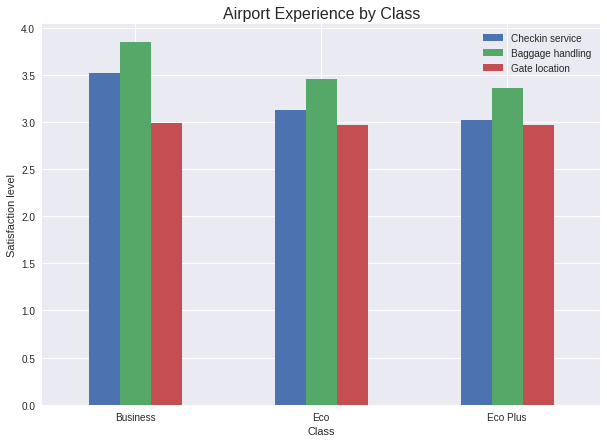

In [ ]:
airport_exp = df2.groupby(['Class'])[['Checkin service','Baggage handling','Gate location']].mean()

airport_exp.plot(kind='bar',figsize=(10,7))

plt.title('Airport Experience by Class', size=16)
plt.xticks(rotation='horizontal')
plt.ylabel('Satisfaction level')

**Analisis :**
- Dari chart diatas terlihat bahwa satu-satunya service yang ada dibawah batas netral (angka 3) adalah `gate location`. Dari ketiga class juga tingkat kepuasannya dibawah angka 3, oleh karena itu bisa disimpulkan bahwa bisa dilakukan improvement pada service ini.

- Pada kenyataannya `gate location` adalah hal yang tidak dapat diubah pada industri penerbangan, yang bisa dilakukan adalah memberikan extra service dengan menggunakan alat transportasi tambahan secara cuma-cuma atau berbayar pada waktu tertentu untuk mencapai gate check in.

#### Inflight Experience

Inflight Experience meliputi:
- Cleanliness
- Inflight wifi service
- Inflight service
- Leg room service
- Inflight entertainment
- Seat comfort
- Food and drink
- On-board service

Text(0, 0.5, 'Satisfaction level')

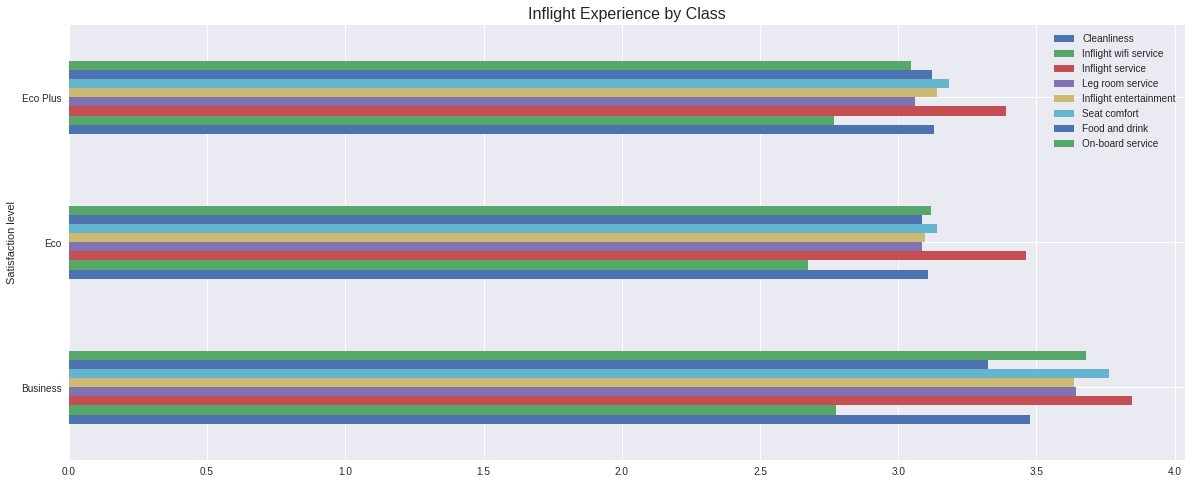

In [ ]:
inflight_exp = df2.groupby(['Class'])[['Cleanliness','Inflight wifi service','Inflight service','Leg room service','Inflight entertainment','Seat comfort','Food and drink','On-board service']].mean()

inflight_exp.sort_values(by='Class').plot(kind='barh',figsize=(20,8))

plt.title('Inflight Experience by Class', size=16)
plt.xticks(rotation='horizontal')
plt.ylabel('Satisfaction level')

**Analisis :**
- Dengan melihat lebih detil, maka kita dapat menemukan tingkat satisfaction tertinggi dari setiap kelompok customer experience, yaitu `Online Boarding` (Pre-flight), `Baggage Handling` (Airport), dan `Inflight Service` (Inflight).
- Dari setiap kelas pun terlihat bahwa kelas Business memiliki tingkat kepuasan yang relatif lebih tinggi dibanding yang lain.

# Preprocessing

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43,3.86,3.33,3.00,4.38,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7,2.29,2.67,2.33,2.12,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,3.71,3.00,3.33,4.12,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20,3.00,4.00,3.00,2.62,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,3.50,3.67,3.33,3.50,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Kita akan melakukan 2 jenis encoding kepada kolom-kolom kategorikal:
1. **One Hot Encoding** kepada `Gender, Customer Type, dan Type of Travel` karena memiliki sedikit jumlah unique value.
2. **Ordinal Encoding** kepada `Class` karena memiliki urutan.
<br><br>

Kita juga akan melakukan scaling menggunakan RobustScaler karena beberapa feature numerikal memiliki persebaran data tidak normal.

In [40]:
# ordinal mapping
ordinal_mapping = [
    {'col':'Class', 'mapping':{'Eco':1, 'Eco Plus':2, 'Business':3}},
]
ordinal_encoder = ce.OrdinalEncoder(cols=['Class'], mapping=ordinal_mapping)

# transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Gender','Customer Type','Type of Travel']),
    ('ordinal', ordinal_encoder, ['Class'])
], remainder='passthrough')

# scaler
scaler = RobustScaler()

In [41]:
# define X and y
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [42]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

# Modelling

In [ ]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
cat = CatBoostClassifier(random_state=0)

In [ ]:
models = [logreg, knn, dt, rf, adb, xgb, cat]
score = []
mean = []
std = []

for i in models:
    estimator = Pipeline([
        ('preprocess',transformer),
        ('scaler',scaler),
        ('model',i)
        ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=5,
        scoring='f1')

    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'CatBoost'],
    'f1-score mean':mean,'f1-score std':std}).set_index('model').sort_values(by='f1-score mean',ascending=False)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3837982	total: 147ms	remaining: 29.2s
5:	learn: 0.3582288	total: 167ms	remaining: 27.6s
6:	learn: 0.3344962	total: 188ms	remaining: 26.6s
7:	learn: 0.3137262	total: 214ms	remaining: 26.5s
8:	learn: 0.2962489	total: 235ms	remaining: 25.9s
9:	learn: 0.2762238	total: 257ms	remaining: 25.4s
10:	learn: 0.2662777	total: 276ms	remaining: 24.8s
11:	learn: 0.2538656	total: 294ms	remaining: 24.2s
12:	learn: 0.2389024	total: 314ms	remaining: 23.8s
13:	learn: 0.2302835	total: 335ms	remaining: 23.6s
14:	learn: 0.2141861	total: 355ms	remaining: 23.3s
15:	learn: 0.2063816	total: 375ms	remaining: 23s
16:	learn: 0.2017838	total: 395ms	remaining: 22.8s
17:	learn: 0.1954025	total: 418ms	remaining: 22.8s
18:	learn: 0.1919266	total: 447ms	remaining: 23.1s
19:	learn: 0.1882601	total: 468ms	remaining: 23s
20:	learn: 0.1827982	total: 493ms	remaining: 23s
21:	learn: 0.1772594	total: 514ms	remaining: 22.8s
22:	learn: 0.1748173	total: 534ms	remaining

,f1-score mean,f1-score std
model,,
CatBoost,0.956894,0.001858
Random Forest,0.953560,0.001013
Decision Tree,0.935733,0.001807
XGBoost,0.928496,0.001771
AdaBoost,0.915353,0.002238
KNN,0.905829,0.002445
Logistic Regression,0.852833,0.002274


Kita dapat melihat dari tabel bahwa **CatBoost** memiliki rata-rata f1-score tertinggi. Meskipun **Random Forest** sedikit lebih rendah, model ini lebih mudah untuk tidak overfitting. **Untuk mendapatkan hasil terbaik**, maka kita akan melakukan tuning ke kedua model dan melihat model mana yang performanya tetap lebih tinggi dan overfitting.
<br><br>

**References :**
- https://stackoverflow.com/questions/46190046/gradient-boosting-vs-random-forest
- https://www.quora.com/How-do-random-forests-and-boosted-decision-trees-compare
- https://www.quora.com/When-is-a-random-forest-a-poor-choice-relative-to-other-algorithms

## CatBoost

CatBoost adalah salah satu model dari Gradient Boosted Decision Tree yang bekerja dengan membuat decision tree berulang, dimana tree selanjutnya akan mempelajari kekurangan dari tree sebelumnya, sehingga menghasilkan tree yang lebih baik.
<br><br>

**References :**
- https://catboost.ai/en/docs/concepts/algorithm-main-stages
- https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html

### Hyperparameter Tuning

Kita akan melakukan hyperparameter tuning untuk melihat apakah performa model masih bisa ditingkatkan sehingga lebih akurat dan menggunakan RandomSearch sehingga dapat menggunakan opsi yang lebih luas.
<br><br>

Tuning dilakukan beberapa kali dengan mempersempit range parameter untuk mendapatkan hasil terbaik. Di bawah ini hanya ditampilkan proses tuning terbaik yang berhasil mendapat score yang lebih tinggi secara general, meskipun tidak signifikan.
<br><br>

**References :**
- https://catboost.ai/en/docs/references/training-parameters/
- https://www.kaggle.com/code/shivampanwar/catboost-and-hyperparameter-tuning-using-bayes/notebook
- https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html

Attempt #1 (for reference)
<br><br>

Range parameter basis:
- 'model__depth': np.arange(1, 11, 1)
- 'model__iterations': np.arange(10, 1001, 10)
- 'model__l2_leaf_reg': np.arange(2, 31, 1)
- 'model__learning_rate': np.arange(0.1, 1.01, 0.1)
- 'model__border_count': np.arange(5, 201, 5)

Best F1-Score:  0.9557760679093719

Best Param:  {'model__learning_rate': 0.2, 'model__l2_leaf_reg': 17, 'model__iterations': 810, 'model__depth': 6, 'model__border_count': 180}

Attempt #3

In [ ]:
cat = CatBoostClassifier(random_state=0)
cat_pipe = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', cat)
])

hyperparam_space = {
    'model__depth': np.arange(7, 10, 1),
    'model__iterations': np.arange(815, 831, 1),
    'model__l2_leaf_reg': np.arange(10, 13, 1),
    'model__learning_rate': np.arange(0.01, 0.11, 0.01),
    'model__border_count': np.arange(165, 181, 1),
}

cat_random_search = RandomizedSearchCV(
    estimator=cat_pipe,
    param_distributions=hyperparam_space,
    cv=5,
    n_iter=20,
    random_state=10,
    n_jobs=-1,
    scoring='f1'
)

# fitting random search
cat_random_search.fit(X_train, y_train)

0:	learn: 0.6137884	total: 42.9ms	remaining: 35.3s
1:	learn: 0.5547154	total: 75.1ms	remaining: 30.9s
2:	learn: 0.5092965	total: 106ms	remaining: 29.1s
3:	learn: 0.4701900	total: 137ms	remaining: 28.2s
4:	learn: 0.4256483	total: 168ms	remaining: 27.6s
5:	learn: 0.3878064	total: 200ms	remaining: 27.2s
6:	learn: 0.3640342	total: 231ms	remaining: 27s
7:	learn: 0.3379329	total: 275ms	remaining: 28.1s
8:	learn: 0.3209631	total: 316ms	remaining: 28.7s
9:	learn: 0.3041226	total: 347ms	remaining: 28.3s
10:	learn: 0.2896966	total: 378ms	remaining: 28s
11:	learn: 0.2683971	total: 411ms	remaining: 27.8s
12:	learn: 0.2577896	total: 443ms	remaining: 27.7s
13:	learn: 0.2455462	total: 483ms	remaining: 28s
14:	learn: 0.2390652	total: 513ms	remaining: 27.7s
15:	learn: 0.2270240	total: 547ms	remaining: 27.7s
16:	learn: 0.2176625	total: 581ms	remaining: 27.6s
17:	learn: 0.2101079	total: 614ms	remaining: 27.5s
18:	learn: 0.2055676	total: 646ms	remaining: 27.4s
19:	learn: 0.1987146	total: 680ms	remaining: 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type',
                                                                                'Type '
                                                                                'of '
                                                                                'Travel']),
                                                                              ('ordinal',
   

In [ ]:
print('Best F1-Score: ', cat_random_search.best_score_)
print('Best Param: ', cat_random_search.best_params_)

Best F1-Score:  0.9579163779238886
Best Param:  {'model__learning_rate': 0.04, 'model__l2_leaf_reg': 10, 'model__iterations': 825, 'model__depth': 8, 'model__border_count': 176}


### Fitting

#### Base Model

In [43]:
# Model sebelum dilakukan hyperparameter tuning
cat_base = CatBoostClassifier(random_state=0)
cat_base_model = Pipeline([
        ('transform', transformer),
        ('scale', scaler),
        ('model', cat_base)
    ])

cat_base_model.fit(X_train, y_train)

Learning rate set to 0.068023
0:	learn: 0.6026507	total: 76.4ms	remaining: 1m 16s
1:	learn: 0.5298300	total: 99ms	remaining: 49.4s
2:	learn: 0.4718497	total: 122ms	remaining: 40.7s
3:	learn: 0.4091896	total: 147ms	remaining: 36.6s
4:	learn: 0.3663366	total: 171ms	remaining: 34s
5:	learn: 0.3356209	total: 195ms	remaining: 32.4s
6:	learn: 0.3128791	total: 223ms	remaining: 31.6s
7:	learn: 0.2864759	total: 256ms	remaining: 31.7s
8:	learn: 0.2714963	total: 293ms	remaining: 32.2s
9:	learn: 0.2604409	total: 315ms	remaining: 31.2s
10:	learn: 0.2493053	total: 340ms	remaining: 30.6s
11:	learn: 0.2387663	total: 368ms	remaining: 30.3s
12:	learn: 0.2257625	total: 392ms	remaining: 29.8s
13:	learn: 0.2141917	total: 430ms	remaining: 30.3s
14:	learn: 0.2091336	total: 453ms	remaining: 29.8s
15:	learn: 0.2018984	total: 476ms	remaining: 29.3s
16:	learn: 0.1948142	total: 503ms	remaining: 29.1s
17:	learn: 0.1898044	total: 527ms	remaining: 28.8s
18:	learn: 0.1837417	total: 549ms	remaining: 28.4s
19:	learn: 0

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Class'],
                                                                 mapping=[{'col': 'Class',
                                                                           'mapping': {'Business': 3,
                                                                                       'Eco': 1,
                                                                                       'Eco Plus': 2}}]),
                                                  ['Class'])])),
                ('s

#### Best Model

CatBoost Attempt 3
<br>
Best Param:  {'model__learning_rate': 0.04, 'model__l2_leaf_reg': 10, 'model__iterations': 825, 'model__depth': 8, 'model__border_count': 176}

In [44]:
# Model setelah dilakukan hyperparameter tuning (using best parameter from tuning manually)
cat_best = CatBoostClassifier(random_state=0, depth=8, iterations=825, l2_leaf_reg=10, learning_rate=0.04, border_count= 176) # to be updated

cat_best_model = Pipeline([
        ('transform', transformer),
        ('scale', scaler),
        ('model', cat_best)
    ])

cat_best_model.fit(X_train, y_train)

0:	learn: 0.6137884	total: 30.9ms	remaining: 25.5s
1:	learn: 0.5547154	total: 58ms	remaining: 23.8s
2:	learn: 0.5092965	total: 89.3ms	remaining: 24.5s
3:	learn: 0.4701900	total: 118ms	remaining: 24.2s
4:	learn: 0.4256483	total: 145ms	remaining: 23.8s
5:	learn: 0.3878064	total: 173ms	remaining: 23.6s
6:	learn: 0.3640342	total: 201ms	remaining: 23.4s
7:	learn: 0.3379329	total: 233ms	remaining: 23.8s
8:	learn: 0.3209631	total: 262ms	remaining: 23.8s
9:	learn: 0.3041226	total: 298ms	remaining: 24.3s
10:	learn: 0.2896966	total: 327ms	remaining: 24.2s
11:	learn: 0.2683971	total: 363ms	remaining: 24.6s
12:	learn: 0.2577896	total: 392ms	remaining: 24.5s
13:	learn: 0.2455462	total: 422ms	remaining: 24.4s
14:	learn: 0.2390652	total: 458ms	remaining: 24.7s
15:	learn: 0.2270240	total: 489ms	remaining: 24.7s
16:	learn: 0.2176625	total: 523ms	remaining: 24.9s
17:	learn: 0.2101079	total: 552ms	remaining: 24.8s
18:	learn: 0.2055676	total: 581ms	remaining: 24.6s
19:	learn: 0.1987146	total: 611ms	remain

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Class'],
                                                                 mapping=[{'col': 'Class',
                                                                           'mapping': {'Business': 3,
                                                                                       'Eco': 1,
                                                                                       'Eco Plus': 2}}]),
                                                  ['Class'])])),
                ('s

### Scoring

In [45]:
# Predict
cat_y_pred_base = cat_base_model.predict(X_test)
cat_y_pred_proba_base = cat_base_model.predict_proba(X_test)
cat_y_pred_tuned = cat_best_model.predict(X_test)
cat_y_pred_proba_tuned = cat_best_model.predict_proba(X_test)

In [49]:
cat_f1_score_base = f1_score(y_test, cat_y_pred_base)
cat_f1_score_tuned = f1_score(y_test, cat_y_pred_tuned)

print('F1-Score Base CatBoost : ', cat_f1_score_base)
print('F1-Score Tuned CatBoost : ', cat_f1_score_tuned)

F1-Score Base CatBoost :  0.9579368207669351
F1-Score Tuned CatBoost :  0.9582581227436823


In [50]:
cat_roc_auc_base = roc_auc_score(y_test, cat_y_pred_proba_base[:,1])
cat_roc_auc_tuned = roc_auc_score(y_test, cat_y_pred_proba_tuned[:,1])

print('ROC AUC Score Base CatBoost : ', cat_roc_auc_base)
print('ROC AUC Score Tuned CatBoost : ', cat_roc_auc_tuned)

ROC AUC Score Base CatBoost :  0.9952735723511094
ROC AUC Score Tuned CatBoost :  0.995314584062598


In [51]:
cat_report_base = classification_report(y_test, cat_y_pred_base)
cat_report_tuned = classification_report(y_test, cat_y_pred_tuned)

print('Classification Report Base CatBoost : \n', cat_report_base)
print('Classification Report Tuned CatBoost : \n', cat_report_tuned)

Classification Report Base CatBoost : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Classification Report Tuned CatBoost : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



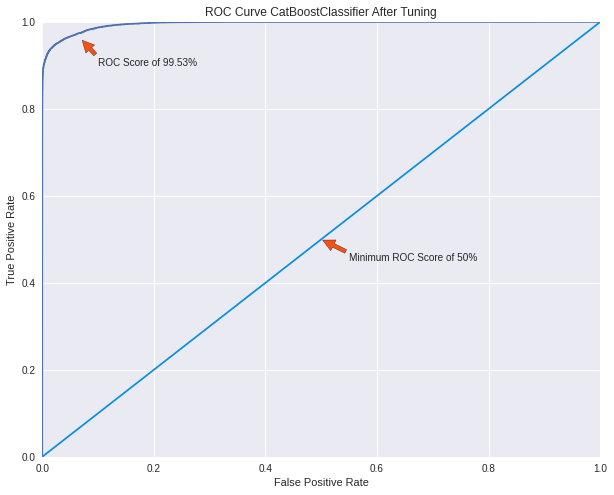

In [52]:
cat_fpr, cat_tpr, threshold = roc_curve(y_test, cat_y_pred_proba_tuned[:,1])

plt.figure(figsize=(10,8))
plt.plot(cat_fpr, cat_tpr)
plt.plot([0,1],[0,1], '#0C8EE0')
plt.axis([0,1,0,1])
plt.title('ROC Curve CatBoostClassifier After Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('ROC Score of 99.53%', xy=(0.07, 0.96), xytext=(0.10,0.90), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.annotate('Minimum ROC Score of 50%', xy=(0.5,0.5), xytext=(0.55,0.45), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.show()

## Random Forest

Random Forest bekerja dengan membuat sejumlah tree dengan parameter acak, dan kemudian melakukan voting/menghitung suara terbanyak dari hasil klasifikasi yang ditampilkan. Sifatnya yang random mencegah model ini untuk overfitting.
<br><br>

**References :**
- https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

### Hyperparameter Tuning

Kita akan melakukan hyperparameter tuning untuk melihat apakah performa model masih bisa ditingkatkan sehingga lebih akurat dan menggunakan RandomSearch sehingga dapat menggunakan opsi yang lebih luas.
<br><br>

Tuning dilakukan beberapa kali dengan mempersempit range parameter untuk mendapatkan hasil terbaik. Di bawah ini hanya ditampilkan proses tuning terbaik yang berhasil mendapat score yang lebih tinggi secara general, meskipun tidak signifikan.
<br><br>

**References :**
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Attempt #1 (for reference)
<br><br>

Range parameter basis:
- 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
- 'model__max_features': ['auto', 'sqrt'],
- 'model__min_samples_leaf': [1, 2, 4],
- 'model__min_samples_split': [2, 5, 10],
- 'model__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

Best f1 score:  0.9545482141398487

Best param:  {'model__n_estimators': 1200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}

Attempt #1

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_pipe = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', rf)
])
# question: scaler bisa dihapus karena tree-based model?

hyperparam_space = {
 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

rf_random_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=hyperparam_space,
    cv=5,
    n_iter=10,
    random_state=10,
    n_jobs=-1,
    scoring='f1'
)

# fitting random search
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type',
                                                                                'Type '
                                                                                'of '
                                                                                'Travel']),
                                                                              ('ordinal',
   

In [ ]:
print('Best f1 Score: ', rf_random_search.best_score_)
print('Best Param: ', rf_random_search.best_params_)

Best f1 score:  0.9545482141398487
Best param:  {'model__n_estimators': 1200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}


Attempt #4

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_pipe = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', rf)
])

hyperparam_space = {
 'model__max_depth': np.arange(10, 51, 10),
 'model__max_features': ['auto', 'sqrt'],
 'model__min_samples_leaf': np.arange(1, 6, 1),
 'model__min_samples_split': np.arange(5, 11, 1),
 'model__n_estimators': np.arange(1000, 1501, 100)
}

rf_random_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=hyperparam_space,
    cv=5,
    n_iter=10,
    random_state=10,
    n_jobs=-1,
    scoring='f1'
)

rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gender',
                                                                                'Customer '
                                                                                'Type',
                                                                                'Type '
                                                                                'of '
                                                                                'Travel']),
                                                                              ('ordinal',
   

In [ ]:
print('Best F1-Score: ', rf_random_search.best_score_)
print('Best Param: ', rf_random_search.best_params_)

Best F1-Score:  0.9542989275372401
Best Param:  {'model__n_estimators': 1100, 'model__min_samples_split': 7, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}


### Fitting

#### Base Model

In [53]:
# Model sebelum dilakukan hyperparameter tuning
rf_base = RandomForestClassifier(random_state=0)
rf_base_model = Pipeline([
        ('transform', transformer),
        ('scale', scaler),
        ('model', rf_base)
    ])

rf_base_model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Class'],
                                                                 mapping=[{'col': 'Class',
                                                                           'mapping': {'Business': 3,
                                                                                       'Eco': 1,
                                                                                       'Eco Plus': 2}}]),
                                                  ['Class'])])),
                ('s

#### Best Model

Random Attempt 1:
<br>
Best param:  {'model__n_estimators': 1200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}

In [54]:
# Model setelah dilakukan hyperparameter tuning (using best parameter from tuning manually)
rf_best = RandomForestClassifier(random_state=0, max_depth=30, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf_best_model = Pipeline([
        ('transform', transformer),
        ('scaler', scaler),
        ('model', rf_best)
    ])

rf_best_model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Class'],
                                                                 mapping=[{'col': 'Class',
                                                                           'mapping': {'Business': 3,
                                                                                       'Eco': 1,
                                                                                       'Eco Plus': 2}}]),
                                                  ['Class'])])),
                ('s

Random Attempt 4:
<br>
Best Param:  {'model__n_estimators': 1100, 'model__min_samples_split': 7, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}

In [ ]:
# Model setelah dilakukan hyperparameter tuning (using best parameter from tuning manually)
rf_best = RandomForestClassifier(random_state=0, max_depth=30, max_features='auto', min_samples_leaf=1, min_samples_split=7, n_estimators=1100)
rf_best_model = Pipeline([
        ('transform', transformer),
        ('scaler', scaler),
        ('model', rf_best)
    ])

rf_best_model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Class'],
                                                                 mapping=[{'col': 'Class',
                                                                           'mapping': {'Business': 3,
                                                                                       'Eco': 1,
                                                                                       'Eco Plus': 2}}]),
                                                  ['Class'])])),
                ('s

### Scoring

Meskipun Random Forest berhasil menghasilkan 2 tuning yang baik, namun kita akan tetap menggunakan **parameter tuning pertama (Attempt #1)** karena berhasil kenaikan lebih tinggi secara general.

In [55]:
# Predict
rf_y_pred_base = rf_base_model.predict(X_test)
rf_y_pred_proba_base = rf_base_model.predict_proba(X_test)
rf_y_pred_tuned = rf_best_model.predict(X_test)
rf_y_pred_proba_tuned = rf_best_model.predict_proba(X_test)

In [56]:
rf_f1_score_base = f1_score(y_test, rf_y_pred_base)
rf_f1_score_tuned = f1_score(y_test, rf_y_pred_tuned)

print('F1-Score Base Random Forest : ', rf_f1_score_base)
print('F1-Score Tuned Random Forest : ', rf_f1_score_tuned)

F1-Score Base Random Forest :  0.9560358936734579
F1-Score Tuned Random Forest :  0.9564187855894459


In [57]:
rf_roc_auc_base = roc_auc_score(y_test, rf_y_pred_proba_base[:,1])
rf_roc_auc_tuned = roc_auc_score(y_test, rf_y_pred_proba_tuned[:,1])

print('ROC AUC Score Base Random Forest : ', rf_roc_auc_base)
print('ROC AUC Score Tuned Random Forest : ', rf_roc_auc_tuned)

ROC AUC Score Base Random Forest :  0.9936154082197691
ROC AUC Score Tuned Random Forest :  0.9940253508769283


In [58]:
rf_report_base = classification_report(y_test, rf_y_pred_base)
rf_report_tuned = classification_report(y_test, rf_y_pred_tuned)

print('Classification Report Base Random Forest : \n', rf_report_base)
print('Classification Report Tuned Random Forest : \n', rf_report_tuned)

Classification Report Base Random Forest : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Classification Report Tuned Random Forest : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



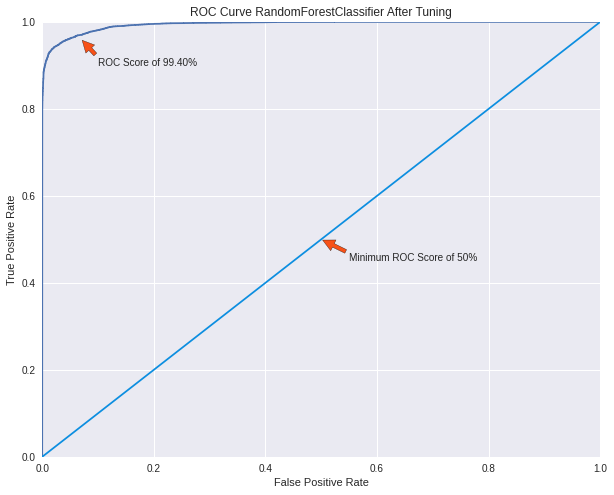

In [59]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_y_pred_proba_tuned[:,1])

plt.figure(figsize=(10,8))
plt.plot(rf_fpr, rf_tpr)
plt.plot([0,1],[0,1], '#0C8EE0')
plt.axis([0,1,0,1])
plt.title('ROC Curve RandomForestClassifier After Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('ROC Score of 99.40%', xy=(0.07, 0.96), xytext=(0.10,0.90), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.annotate('Minimum ROC Score of 50%', xy=(0.5,0.5), xytext=(0.55,0.45), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.show()

## Testing Model on test.csv

Kita juga akan melakukan pengecekan model kepada dataset test.csv (yang juga terdapat di Kaggle) untuk memastikan model tidak overfit dan bekerja dengan baik.

In [60]:
# Load Dataset from GitHub
url = 'https://raw.githubusercontent.com/PurwadhikaDev/ZetaSquad_JC_DS_LS_01_FinalProject/main/Dataset/test.csv'
df_new = pd.read_csv(url)

In [61]:
# Transform target
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

df_new['satisfaction'] = df_new['satisfaction'].apply(transform_satisfaction)

# Drop unnecessary columns
df_new = df_new.drop(['Unnamed: 0', 'id'], axis = 1)

In [62]:
# Impute
imp_it = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=10)
df_new[['Departure Delay in Minutes', 'Arrival Delay in Minutes']] = imp_it.fit_transform(df_new[['Departure Delay in Minutes', 'Arrival Delay in Minutes']])

# Change datatype
df_new['Departure Delay in Minutes'] = df_new['Departure Delay in Minutes'].astype(int)
df_new['Arrival Delay in Minutes'] = df_new['Arrival Delay in Minutes'].astype(int)

[IterativeImputer] Early stopping criterion not reached.


In [63]:
# Feature engineering
df_new['Total Delay'] = df_new['Departure Delay in Minutes'] + df_new['Arrival Delay in Minutes']
df_new['Overall Satisfaction'] = round(df_new[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']].mean(axis=1),2)
df_new['Pre-flight Experience'] = round(df_new[['Ease of Online booking','Online boarding','Departure/Arrival time convenient']].mean(axis=1),2)
df_new['Airport Experience'] = round(df_new[['Checkin service','Baggage handling','Gate location']].mean(axis=1),2)
df_new['Inflight Experience'] = round(df_new[['Cleanliness','Inflight wifi service','Inflight service','Leg room service','Inflight entertainment','Seat comfort','Food and drink','On-board service']].mean(axis=1),2)

# Reorder columns
cols_at_end = ['satisfaction']
df_new = df_new[[c for c in df_new if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_new]]

# Multicol - Drop Columns
df_new.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
# define X and y
X_new = df.drop(columns=['satisfaction'])
y_new = df['satisfaction']

CatBoost

In [65]:
# Predict CatBoost
catNew_y_pred_base = cat_base_model.predict(X_new)
catNew_y_pred_proba_base = cat_base_model.predict_proba(X_new)
catNew_y_pred_tuned = cat_best_model.predict(X_new)
catNew_y_pred_proba_tuned = cat_best_model.predict_proba(X_new)

In [66]:
catNew_f1_score_base = f1_score(y_new, catNew_y_pred_base)
catNew_f1_score_tuned = f1_score(y_new, catNew_y_pred_tuned)

print('F1-Score Base CatBoost : ', catNew_f1_score_base)
print('F1-Score Tuned CatBoost : ', catNew_f1_score_tuned)

F1-Score Base CatBoost :  0.969936139593452
F1-Score Tuned CatBoost :  0.9672812461283747


In [67]:
catNew_roc_auc_base = roc_auc_score(y_new, catNew_y_pred_proba_base[:,1])
catNew_roc_auc_tuned = roc_auc_score(y_new, catNew_y_pred_proba_tuned[:,1])

print('ROC AUC Score Base CatBoost : ', catNew_roc_auc_base)
print('ROC AUC Score Tuned CatBoost : ', catNew_roc_auc_tuned)

ROC AUC Score Base CatBoost :  0.9977124378374158
ROC AUC Score Tuned CatBoost :  0.997414698128449


Random Forest

In [68]:
# Predict Random Forest
rfNew_y_pred_base = rf_base_model.predict(X_new)
rfNew_y_pred_proba_base = rf_base_model.predict_proba(X_new)
rfNew_y_pred_tuned = rf_best_model.predict(X_new)
rfNew_y_pred_proba_tuned = rf_best_model.predict_proba(X_new)

In [69]:
rfNew_f1_score_base = f1_score(y_new, rfNew_y_pred_base)
rfNew_f1_score_tuned = f1_score(y_new, rfNew_y_pred_tuned)

print('F1-Score Base Random Forest : ', rfNew_f1_score_base)
print('F1-Score Tuned Random Forest : ', rfNew_f1_score_tuned)

F1-Score Base Random Forest :  0.9913212045588743
F1-Score Tuned Random Forest :  0.9884893210820708


In [70]:
rfNew_roc_auc_base = roc_auc_score(y_new, rfNew_y_pred_proba_base[:,1])
rfNew_roc_auc_tuned = roc_auc_score(y_new, rfNew_y_pred_proba_tuned[:,1])

print('ROC AUC Score Base Random Forest : ', rfNew_roc_auc_base)
print('ROC AUC Score Tuned Random Forest : ', rfNew_roc_auc_tuned)

ROC AUC Score Base Random Forest :  0.9994273109952039
ROC AUC Score Tuned Random Forest :  0.9992568400779853


Terbukti bahwa kedua model, baik Random Forest maupun CatBoost, **tidak overfitting**, sehingga kedua model valid untuk digunakan.

## Comparison

Berikut perbandingan kedua model terbaik sebelum dan sesudah dituning. Terdapat kenaikan yang terlihat meskipun tidak signifikan.
<br><br>

**CatBoost**
<br>

| Metric | Before/After Tuning | Score |
| --- | --- | --- |
| F1-Score Train | Before | 0.956894 |
| F1-Score Train | After | 0.957916 |
| F1-Score Test | Before | 0.9579368207669351 |
| F1-Score Test | After | 0.9582581227436823 |
| ROC AUC Test | Before | 0.9952735723511094 |
| ROC AUC Test | After | 0.995314584062598 |

<br>

*Best parameter:  {'model__learning_rate': 0.04, 'model__l2_leaf_reg': 10, 'model__iterations': 825, 'model__depth': 8, 'model__border_count': 176}*
<br><br>

**Random Forest**
<br>

| Metric | Before/After Tuning | Score |
| --- | --- | --- |
| F1-Score Train | Before | 0.953560 |
| F1-Score Train | After | 0.954548 |
| F1-Score Test | Before | 0.9560358936734579 |
| F1-Score Test | After | 0.9564187855894459 |
| ROC AUC Test | Before | 0.9936154082197691 |
| ROC AUC Test | After | 0.9940253508769283 |

<br>

*Best parameter: {'model__n_estimators': 1200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 30}*


Kita akan menggunakan **CatBoost** karena terbukti memiliki performa yang lebih tinggi, tidak overfitting, dan prosesnya lebih cepat/tidak memakan waktu dibandingkan dengan **Random Forest**.

## Feature Importances

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


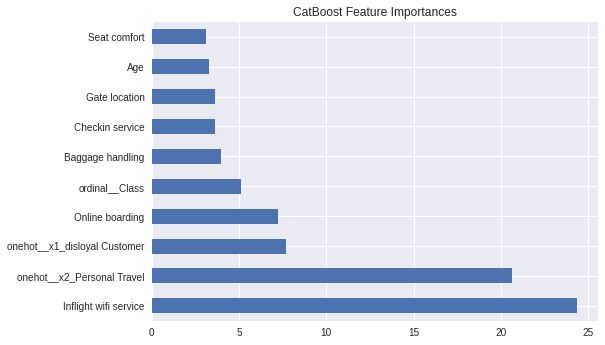

In [ ]:
coef1 = pd.Series(cat_best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='CatBoost Feature Importances')
plt.show()

Dari sini kita dapat melihat dan menjawab pertanyaan **feature mana saja yang pengaruhnya signifikan terhadap kepuasan pelanggan**. Maka kita akan menggunakan graph di atas sebagai acuan untuk memberikan rekomendasi kepada tim lainnya.
<br><br>

## SHAP Values

Kita juga dapat lihat analisis lebih lanjut menggunakan SHAP Values.
<br><br>

**Reference SHAP Values :**
- https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137
- https://towardsdatascience.com/the-right-way-to-compute-your-shapley-values-cfea30509254

In [ ]:
df_shap = df.copy()
df_shap.drop(columns=['satisfaction'], inplace=True)
df_shap.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43,3.86,3.33,3.00,4.38
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7,2.29,2.67,2.33,2.12
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,3.71,3.00,3.33,4.12
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20,3.00,4.00,3.00,2.62
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,3.50,3.67,3.33,3.50


In [ ]:
ordinal_mapping = [
    {'col':'Class', 'mapping':{'Eco':1, 'Eco Plus':2, 'Business':3}},
    {'col':'Gender', 'mapping':{'Male':1, 'Female':2}},
    {'col':'Customer Type', 'mapping':{'disloyal Customer':1, 'Loyal Customer':2}},
    {'col':'Type of Travel', 'mapping':{'Personal Travel':1, 'Business travel':2}},
]
ordinal_encoder = ce.OrdinalEncoder(cols=['Class','Customer Type','Type of Travel','Gender'], mapping=ordinal_mapping)

df_shap = ordinal_encoder.fit_transform(df_shap)
df_shap.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Overall Satisfaction,Pre-flight Experience,Airport Experience,Inflight Experience
0,1,2,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43,3.86,3.33,3.00,4.38
1,1,1,25,2,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7,2.29,2.67,2.33,2.12
2,2,2,26,2,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,3.71,3.00,3.33,4.12
3,2,2,25,2,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20,3.00,4.00,3.00,2.62
4,1,2,61,2,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,3.50,3.67,3.33,3.50


In [ ]:
model = cat_best.fit(df_shap, df['satisfaction'], verbose=False)

explainer_cat = shap.Explainer(model)

In [ ]:
shap_val = explainer_cat.shap_values(df_shap)

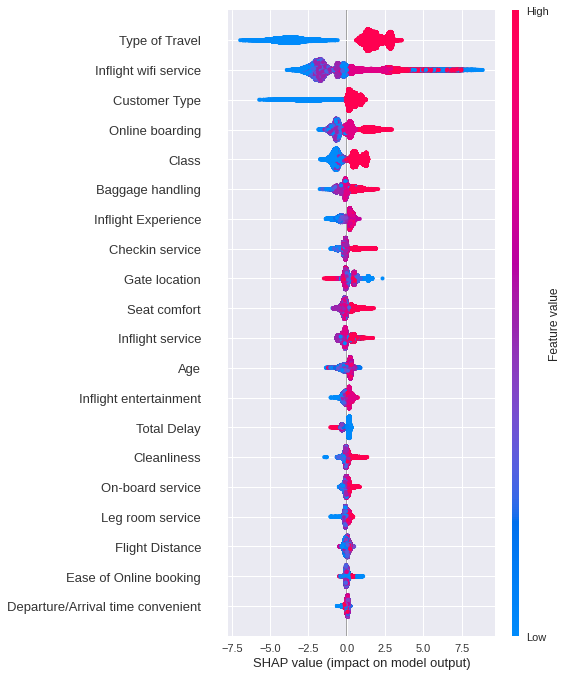

In [ ]:
shap.summary_plot(shap_val, df_shap)

Berdasarkan **SHAP Values**, kita dapat melihat:
1. `Class`: Kelas Business berpengaruh secara positif terhadap target.
2. `Type of Travel`: Jenis travel Business berpengaruh secara positif terhadap target.
3. `Customer Type`: Pelanggan yang setia berpengaruh secara positif terhadap target.
4. `Total Delay`: Total waktu terlambat yang kecil berpengaruh secara positif terhadap target.
5. Secara keseluruhan, semakin tinggi nilai kepuasan masing-masing features berpengaruh positif terhadap target, tetapi ada beberapa yang justru berpengaruh negatif seperti `Gate Location` dan `Ease of Online Booking`.

# Conclusion & Recommendation

## Confusion Matrix

Dengan menggabungkan informasi dari beberapa *source*, maka kita dapat mendapatkan harga penerbangan secara general di tahun 2018 (karena dataset dibuat pada tahun tersebut) dan menghitung baik **pendapatan** yang didapat maupun **cost** yang perlu dikeluarkan dan dapat diminimalisir dalam penanggulangan kepuasan pelanggan.
<br><br>

**Reference :**
- https://www.rome2rio.com/blog/2013/01/02/170779446/
- https://www.bts.gov/newsroom/4q-2021-air-fare-tables
- https://www.pwc.com.au/digitalpulse/airline-marketing-sales-digital-strategy.html#:~:text=Our%20financial%20performance%20analysis%20of,costs%20on%20sales%20and%20marketing.

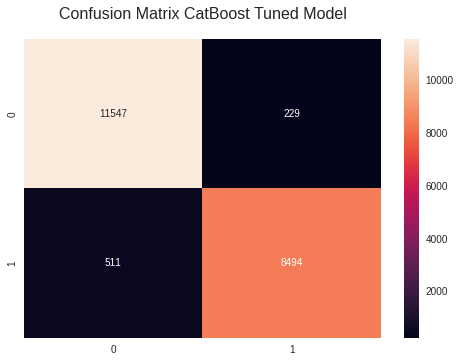

In [ ]:
cat_mat = confusion_matrix(y_test, cat_y_pred_tuned)
sns.heatmap(cat_mat, annot=True, fmt="g")
plt.title('Confusion Matrix CatBoost Tuned Model', size=16, pad=20)
plt.show()

Informasi general seputar tiket:
- Rata-rata tiket per orang = 116 USD (tidak dipisah oleh `class`)
- Campaign/Incentive Expense = 6 USD (4.5%-5% dari revenue, kita mengambil kisaran terbesar)

Informasi general seputar pelanggan:
- Total pelanggan pada dataset test = 20.781 orang
- Ratio penerbangan per `class` = 48% Business, 45% Eco, 7% Eco Plus
<br><br>

Perhitungan dengan Confusion Matrix:
- Total Pendapatan = 20.781 x 116 = 2.410.596 USD

- False Positive = find potential loss (fare per customer)
  - Asumsi pelanggan tidak puas dan tidak akan kembali 250 orang
  - Asumsi pelanggan tersebut aktif meyakinkan orang terdekat untuk tidak menggunakan service perusahaan 70%
  - 229 pelanggan + 70% (pelanggan baru yang batal membeli) = 389
  - Potential Loss: 389 x 116 USD = 45.124 USD

- True Positive = calculate cost for incentive that we save (customer x expense)
  - Potential Save: 8.494 x 6 USD = 50.964 USD

- True Negative = calculate campaign cost (cost incentive x customer)
  - Asumsi kita harus memberikan campaign cost untuk retain customer yang tidak puas tersebut
  - Jika berhasil maka retained revenue (11.547 x 116 USD = 1.339.452 USD)
  - Campaign Cost: 11.547 x 6 USD = 69.282 USD

- False Negative = calculate campaign cost (cost incentive x customer)
  - Asumsi sudah mengeluarkan campaign cost untuk customer yang sudah puas
  - Campaign Cost: 511 x 6 USD = 3.066 USD
<br><br>

Summary:
- Retained customer = 1.339.452 (TN)
- Campaign Cost = 69.282 (TN) + 3.066 (FN) = 72.348 USD
- Potential Loss = 45.124 USD (FP)
- Potential Save = 50.964 USD (TP)
- Total possible income after campaign cost = 1.273.034 USD

## Conclusion

In [71]:
print('Classification Report Tuned CatBoost : \n', cat_report_tuned)

Classification Report Tuned CatBoost : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



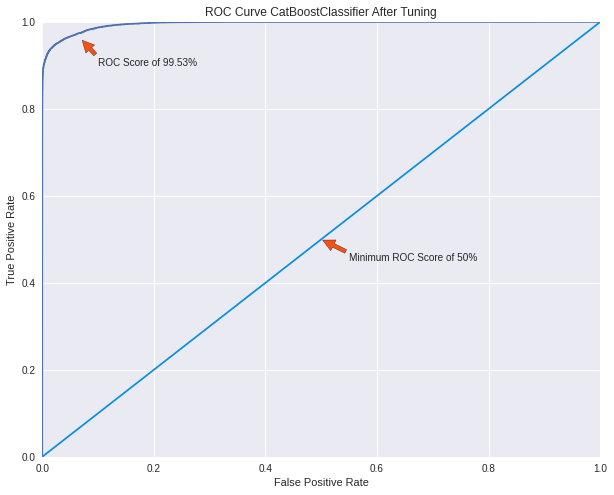

In [72]:
cat_fpr, cat_tpr, threshold = roc_curve(y_test, cat_y_pred_proba_tuned[:,1])

plt.figure(figsize=(10,8))
plt.plot(cat_fpr, cat_tpr)
plt.plot([0,1],[0,1], '#0C8EE0')
plt.axis([0,1,0,1])
plt.title('ROC Curve CatBoostClassifier After Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('ROC Score of 99.53%', xy=(0.07, 0.96), xytext=(0.10,0.90), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.annotate('Minimum ROC Score of 50%', xy=(0.5,0.5), xytext=(0.55,0.45), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.show()

Hal-hal yang dapat dikonklusikan berdasarkan hasil classification report:
- Berdasarkan `Recall`, terdapat 98% pelanggan yang perlu diberikan insentif dan seharusnya tidak puas, dan terdapat 94% pelanggan yang tidak perlu diberikan insentif dan seharusnya puas.
- Berdasarkan `Precision`, kita dapat memprediksi 96% pelanggan yang tidak puas dengan tepat, dan memprediksi 97% pelanggan yang puas dengan tepat.
- Berdasarkan `Accuracy`, kita dapat memprediksi 96% pelanggan yang seharusnya puas dan tidak puas dengan tepat.
- Berdasarkan `ROC AUC`, kita dapat mampu membedakan dua kelas (satisfied dan dissatisfied/neutral) dengan hampir sempurna.

## Recommendation

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


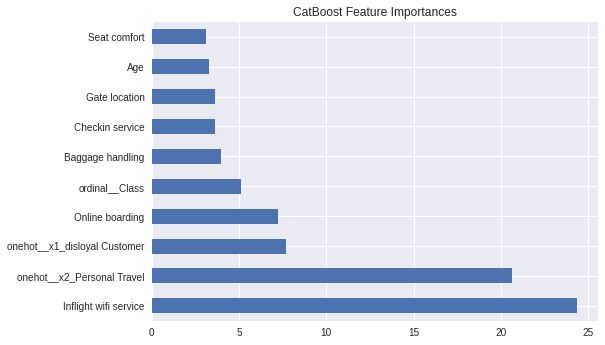

In [ ]:
coef1 = pd.Series(cat_best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='CatBoost Feature Importances')
plt.show()

Hal-hal yang bisa dilakukan untuk mempertahankan pelanggan:

- Memberikan insentif pada feature `inflight wifi service`, seperti: 
  - Menawarkan harga wifi yang lebih terjangkau (bisa dipaketkan di saat booking online), tetapi harga on the spot tetap sesuai untuk mengurangi cost.
  - Menawarkan 15-30 menit wifi gratis untuk setiap pelanggan kelas eco dan eco plus yang melakukan penerbangan di atas batas tertentu (3000 miles / 6 jam) atau mengalami delay di atas batas tertentu (60 menit)

- Berdasarkan EDA, terlihat bahwa `Type of Travel` paling banyak adalah business travel, yaitu sebesar 69% dari keseluruhan pelanggan. Maka, kita dapat mengembangkan campaign B2B yang sudah ada untuk memberikan upgrade dari kelas Eco/Eco Plus menjadi kelas Business dengan harga spesial, karena kelas Business cenderung memiliki tingkat kepuasan yang lebih tinggi dibanding kelas lainnya. 

- Dari EDA kita sudah bisa melihat `loyalitas` pelanggan sangat mempengaruhi pengelompokkan pelanggan, baik dari usia, class, dan type of travel. Secara umum, mileage bonus bisa membantu pelanggan untuk melakukan penerbangan lebih sering, maka kita dapat memvariasikan insentif yang mereka bisa dapat menggunakan mileage bonus, seperti penggunaan lounge di airport ataupun hotel di tempat tujuan.

- Me-review kembali dan mengembangkan sistem `Online Boarding` terutama pada kelas Eco dan Eco Plus, karena di kelas Business memiliki tingkat kepuasan lebih tinggi.

- Berdasarkan EDA, terlihat bahwa `class` business dan eco terbagi cukup rata (48:44), namun lebih banyak pelanggan yang tidak puas di kelas ekonomi (36% dari 44%) dibanding kelas business (14% dari 48%). Maka kita dapat memprioritaskan penanganan kepuasan pelanggan di kelas bisbusinessnis.

- Memberikan insentif pada feature `Age`, seperti:
  - Pelanggan yang berumur relatif lebih muda (dibawah 30) dapat difokuskan untuk menjadi pelanggan setia dengan memberikan bonus mileage lebih, melihat kelompok umur tersebut cenderung lebih sering bepergian.
  - Pelanggan yang berumur relatif lebih tua (diatas 30) dapat difokuskan untuk upgrade ke Business Class dengan memberikan harga promo sebagai Senior Discount Campaign.

- Terlihat terdapat 3 servis di dalam grup `Airport experience` yang berpengaruh cukup tinggi, maka dapat kita memfokuskan resource untuk meningkatkan kualitas service di airpot.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi:
- Mencoba algoritma ML dan model lainnya, kemudian di hyperparameter tuning dengan lebih baik lagi.
- Melakukan survei lebih detil di fitur yang berpengaruh secara signifikan kepada kepuasan pelangaan, seperti `Online Boarding` dan `Inflight wifi service` sehingga dapat meningkatkan performa model.

## Limitation

Model paling baik digunakan dengan beberapa batas nilai feature, seperti:
- `Age`: 7-85 tahun
- `Flight Distance`: 31-4.983 miles
- `Departure/Arrival Delay`: 38-1.592 minutes

# References

General:
- https://jurnalekonomi.lipi.go.id/riebs/article/download/ZH01/pdf/#:~:text=Customer%20satisfaction%20leads%20to%20pas,et%20al.%2C%202011
- https://www.mycustomer.com/experience/engagement/customer-journey-mapping-vs-process-design-do-you-know-the-difference
- https://www.ama.org/marketing-news/how-airlines-get-customer-experience-so-wrong-with-so-much-data/
- https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/#:~:text=most%20common%20one.-,What%20is%20considered%20a%20short%2Dhaul%2C%20medium%2Dhaul%20and,air%20for%20over%2012%20hours.
- https://www.mckinsey.com/industries/travel-logistics-and-infrastructure/our-insights/miles-ahead-how-to-improve-airline-customer-loyalty-programs

Coding:
- https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=After%20you%20allow%20permission%2C%20copy,a%20string%20variable%20in%20Colab.
- https://stackoverflow.com/questions/61704041/how-may-i-insert-an-image-from-my-github-repository-in-my-google-colab-notebook
- https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=missingno%20matrix%20plot%20showing%20data,is%20distributed%20in%20the%20dataframe.
- https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe